#  Credit EDA Assignment

#### Problem statement 

In this case study we undertake the Risk analysis in Banking and Finance services.When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company(non defaulter)

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a   financial loss for the company.(defaulter)

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
1.Approved 
2.Cancelled
3.Refused
4.Unused offer


#### Analysis approches


1. Data understanding- we explore the data provided to us to get familarize with the available information.
2. Data cleaning - firstly we identify missing value,outliers, or imbalance in data  and undertake the appropriate approches to deal with it.
3. Exploratory Data analysis - In this section we use graphical and statistical analysis to identify risk of default.further we will do univariate,segmented univariate and bivariate analysis 

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

#### Data understanding

In [2]:
#read the data 
app_df = pd.read_csv('application_data.csv')


In [3]:
#checking the data 
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#checking shape of data 
app_df.shape

(307511, 122)

In [5]:
#check info and dtypes
app_df.info(verbose = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data cleaning

In [7]:
#finding percentage of missing value 
null_data = app_df.isnull().sum()*100/len(app_df)
null_data

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

There are few variable in data set which has missing values. we are going to drop those variables where missing values are more than 40%. for remaining variables with missing values less than 40% will be treated accordingly.

#### Missing value treatment

In [8]:
#dropping all the columns having missing values more than 40%.
drop_values = null_data[null_data>=40]
app_df1 = app_df.drop(columns = drop_values.index)

In [9]:
app_df1.shape

(307511, 73)

In [10]:
#percentage of missing values after dropping the columns having missing value more than 20%
app_df1.isnull().sum()*100/len(app_df1)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

We are dropping few more selected columns which has no significant values for analysis

In [11]:
list1 = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE']

In [12]:
app_df1.drop(list1, axis = 1 , inplace = True)

In [13]:
app_df1.shape

(307511, 41)

In [14]:
#checking for rows having more than 50% of missing values
len(app_df1[app_df1.isnull().sum(axis = 1)> len(app_df1.columns)//2])

0

as we checked for rows having missing values more than 50% and observed that there is no row present in dataframe having missing values more than 50%. so we are not treating row wise.

In [15]:
app_df1.isnull().sum()*100/len(app_df1)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PRO

for the columns left which are  having missing values more than 13%. we will check them and decide what will be the possible value to inpute them with.

In [16]:
#lising all the columns CREDIT_BUREAU having missing value more than 13%
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [17]:
#removing the rows where value of multiple columns related to CREDIT_BUREAU is null
app_df1 = app_df1.dropna(axis = 0 , subset = col)
app_df1.isnull().sum()*100/len(app_df1)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004135
AMT_GOODS_PRICE                 0.087221
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.267482
CNT_FAM_MEMBERS                 0.000376
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PRO

lets proceed further do operations for remaining null values. 
Imputing columns having null values with Mode value for catagorical column and median value for numerical columns

In [18]:
app_df1['OCCUPATION_TYPE'].fillna(app_df1['OCCUPATION_TYPE'].mode() ,inplace = True)

In [19]:
app_df1['EXT_SOURCE_2'].fillna(app_df1['EXT_SOURCE_2'].median() , inplace = True )
app_df1['EXT_SOURCE_3'].fillna(app_df1['EXT_SOURCE_3'].median() , inplace = True )
app_df1['AMT_ANNUITY'].fillna(app_df1['AMT_ANNUITY'].median() , inplace = True)
app_df1['CNT_FAM_MEMBERS'].fillna(app_df1['CNT_FAM_MEMBERS'].median() , inplace = True)
app_df1['AMT_GOODS_PRICE'].fillna(app_df1['AMT_GOODS_PRICE'].median() , inplace = True)

In [20]:
#cheching percentage of retained rows
round(app_df1.shape[0]/app_df.shape[0] *100 , 2)

86.5

we have retained 86.5% data after cleaning dataset for analysis

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values.

In [21]:
#finding the catagorical columns where value is XNA
app_df1['CODE_GENDER'].value_counts()

F      176264
M       89724
XNA         4
Name: CODE_GENDER, dtype: int64

since females have majority and only 4 columns having NA values so we can update those NA value with F as there will be no impect on dataset

In [22]:
app_df1.loc[app_df1['CODE_GENDER']== 'XNA', 'CODE_GENDER']='F'

In [23]:
#checking and imputing column ORGAIZATION_TYPE
app_df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    58397
XNA                       47711
Self-employed             31921
Other                     14469
Medicine                  10084
Business Entity Type 2     9457
Government                 9263
School                     7989
Trade: type 7              6537
Kindergarten               6159
Construction               5709
Business Entity Type 1     5270
Transport: type 4          4693
Industry: type 9           3062
Trade: type 3              2981
Industry: type 3           2849
Security                   2812
Housing                    2596
Military                   2363
Industry: type 11          2360
Bank                       2267
Police                     2149
Transport: type 2          2048
Agriculture                2019
Postal                     1842
Security Ministries        1828
Trade: type 2              1556
Restaurant                 1501
Services                   1357
University                 1184
Industry: type 7           1156
Transpor

In [24]:
app_df1[['ORGANIZATION_TYPE', 'NAME_INCOME_TYPE']].value_counts()

ORGANIZATION_TYPE       NAME_INCOME_TYPE    
XNA                     Pensioner               47706
Business Entity Type 3  Working                 36223
Self-employed           Working                 21938
Business Entity Type 3  Commercial associate    21630
Self-employed           Commercial associate     9834
Other                   Working                  8734
Business Entity Type 2  Working                  6727
Medicine                Working                  5771
Government              Working                  5203
School                  Working                  4579
Trade: type 7           Working                  4204
Construction            Working                  3891
Kindergarten            Working                  3723
Business Entity Type 1  Working                  3325
Other                   Commercial associate     3288
Transport: type 4       Working                  3131
Medicine                State servant            2980
Government              State servant

From here we can observe that wherever NAME_INCOME_TYPE is Pensioner we have XNA in ORGANIZATION_TYPE. we can impute the null value in ORGANIZATION_TYPE with Pensioner

In [25]:
app_df1['ORGANIZAION_TYPE']= app_df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
app_df1['ORGANIZATION_TYPE'].fillna('Pensioner' , inplace = True)

In [26]:
app_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Other


In [27]:
# as we can observe that some variable[DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH] having negative values which is not possible so converting it into positive values
app_df1['DAYS_BIRTH']= abs(app_df1['DAYS_BIRTH'])

app_df1['DAYS_EMPLOYED'] = abs(app_df1['DAYS_EMPLOYED'])
app_df1['DAYS_REGISTRATION'] = abs(app_df1['DAYS_REGISTRATION'])
app_df1['DAYS_ID_PUBLISH'] = abs(app_df1['DAYS_ID_PUBLISH'])

In [28]:
#Let’s Bin ‘DAYS_BIRTH’ column by converting it to years based on various “AGE_GROUP 
#
app_df1['YEAR_BIRTH']= (app_df1['DAYS_BIRTH']/365).astype(int)
app_df1['YEAR_BIRTH'].unique()
app_df1['AGE_GROUP'] = pd.cut(app_df1['YEAR_BIRTH'] , bins = [19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [29]:
#converting DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH into year group
app_df1['YEAR_EMPLOYED'] = (app_df1['DAYS_EMPLOYED']/365).astype(int)
app_df1['YEAR_EMPLOYED'].unique()
app_df1['YEAR_REGISTRATION'] = (app_df1['DAYS_REGISTRATION']/365).astype(int)
app_df1['YEAR_REGISTRATION'].unique()
app_df1['YEAR_ID_PUBLISH'] = (app_df1['DAYS_ID_PUBLISH']/365).astype(int)
app_df1['YEAR_ID_PUBLISH'].unique()

array([ 5,  0,  6,  9,  1,  2,  8, 13,  3, 10,  7, 12, 11, 14,  4, 16, 15,
       17, 19])

In [30]:
app_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE,YEAR_BIRTH,AGE_GROUP,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Business Entity Type 3,25,Very_Young,1,9,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government,52,Middle_Age,0,11,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Religion,54,Middle_Age,8,11,9
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Other,46,Middle_Age,4,13,1


In [31]:
#we will now check the'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables
app_df1[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,2.659920e+05,2.659920e+05
mean,1.712756e+05,6.063205e+05
std,2.483851e+05,4.048083e+05
min,2.610000e+04,4.500000e+04
25%,1.125000e+05,2.719575e+05
50%,1.575000e+05,5.212800e+05
75%,2.025000e+05,8.131050e+05
max,1.170000e+08,4.050000e+06


In [32]:
# as it is hard to determine the type of customer based on 'AMT_INCOME_TOTAL', 'AMT_CREDIT' values as these are continous.
# we will make make 2 new columns for these respectively  and bin them for easy understanding
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

In [33]:
app_df1['AMT_INCOME_RANGE'] = pd.cut(app_df1['AMT_INCOME_TOTAL'], bins , labels = ranges)
app_df1['AMT_CREDIT_RANGE'] = pd.cut(app_df1['AMT_CREDIT'] , bins , labels = ranges)

In [34]:
app_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE,YEAR_BIRTH,AGE_GROUP,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Business Entity Type 3,25,Very_Young,1,9,5,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government,52,Middle_Age,0,11,6,0-100000,100000-250000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Religion,54,Middle_Age,8,11,9,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Other,46,Middle_Age,4,13,1,0-100000,250000-500000


##### Checking for Imbalance for Data

In [35]:
#dividing the data into two parts Target = 1 (clients with payment difficulties/defaulter)  , Target = 0 (non_defaulter)
df_target0 = app_df1.loc[app_df1['TARGET']==0]
df_target1 = app_df1.loc[app_df1['TARGET']==1]

In [36]:
#checking data imbalance 
round(len(df_target0)/len(df_target1), 2)

#here we can say that 11.95 % clients are defaulter

11.95

In [37]:
df_target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245459 entries, 1 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   245459 non-null  int64   
 1   TARGET                       245459 non-null  int64   
 2   NAME_CONTRACT_TYPE           245459 non-null  object  
 3   CODE_GENDER                  245459 non-null  object  
 4   FLAG_OWN_CAR                 245459 non-null  object  
 5   FLAG_OWN_REALTY              245459 non-null  object  
 6   CNT_CHILDREN                 245459 non-null  int64   
 7   AMT_INCOME_TOTAL             245459 non-null  float64 
 8   AMT_CREDIT                   245459 non-null  float64 
 9   AMT_ANNUITY                  245459 non-null  float64 
 10  AMT_GOODS_PRICE              245459 non-null  float64 
 11  NAME_INCOME_TYPE             245459 non-null  object  
 12  NAME_EDUCATION_TYPE          245459 non-null

here 11.95% data imbalance can be seen.

### we will separatly analyze data base on target variable 

### finding outliers  for Numerical columns 

#### for target 0 (non defaulter)

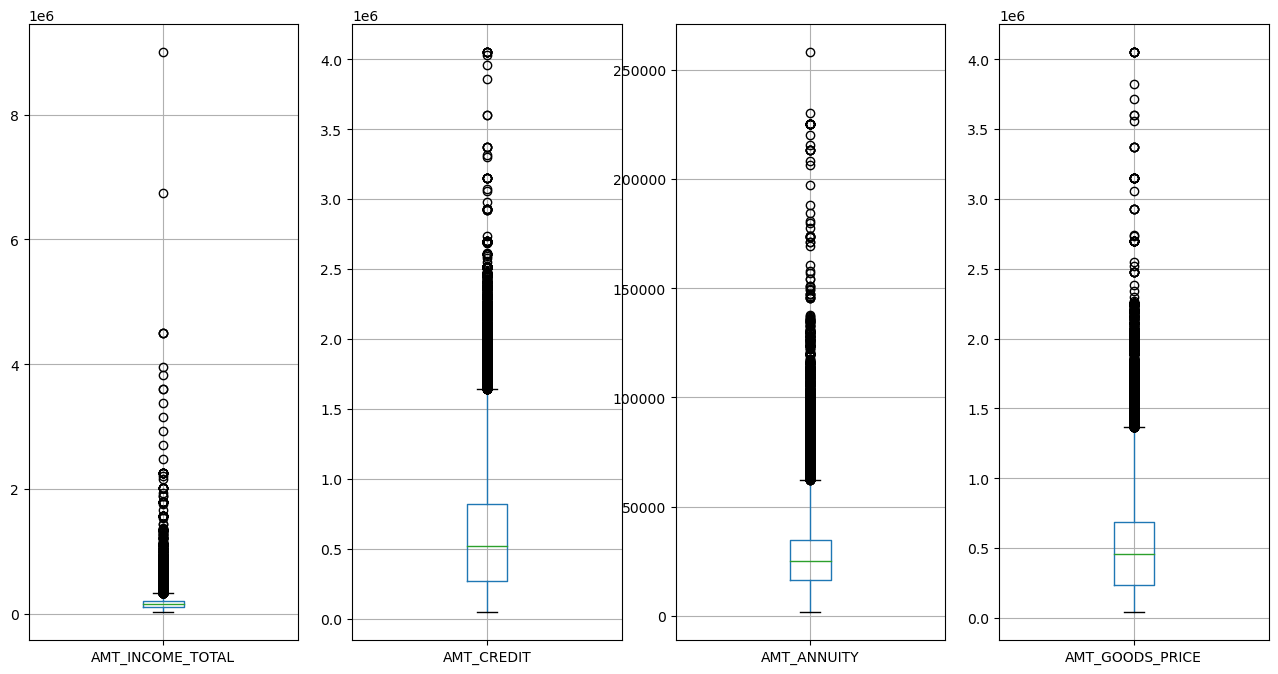

In [38]:
# checking for outliers
cols = df_target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
plt.figure(figsize= (16,8))
plt.tight_layout()
for i , col in enumerate(cols):
    plt.subplot(1,4, i+1)
    df_target0.boxplot(column = col)
plt.show()

here we can conclude that 
- outliers are present in AMT_INCOME_TOTAL as we can see it in graph
- third quantile is very slim for income ammount
- The first quartile is larger than third quartile for credit amount means most of the credits of clients are present in the first quartile.
-The first quartile is bigger than third quartile for Annuity  which means most of the annuity is from 1st quantile


### for Target 1 

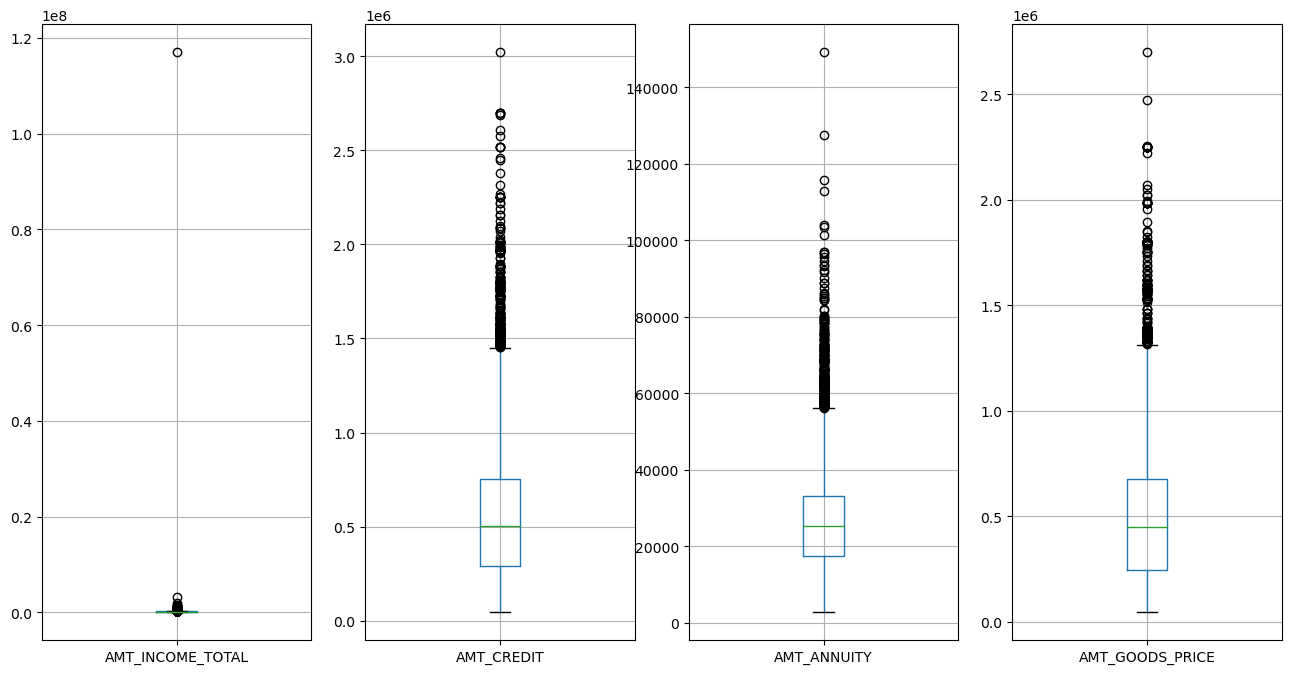

In [39]:
cols1 = df_target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
plt.figure(figsize = (16,8))
for i , col in enumerate(cols1):
    plt.subplot(1,4, i+1)
    df_target1.boxplot(column = col)
plt.show()

we can conclude that
- some outliers are present in INCOME , CREDIT and  ANNUITY 
- most of the clinets for income is present in first quartile
- most of the credit os clint is present is first quartile
- most of the annuity clints are from first quartile

### Univariate analysis 

#### univariate analysis for catagorical variable

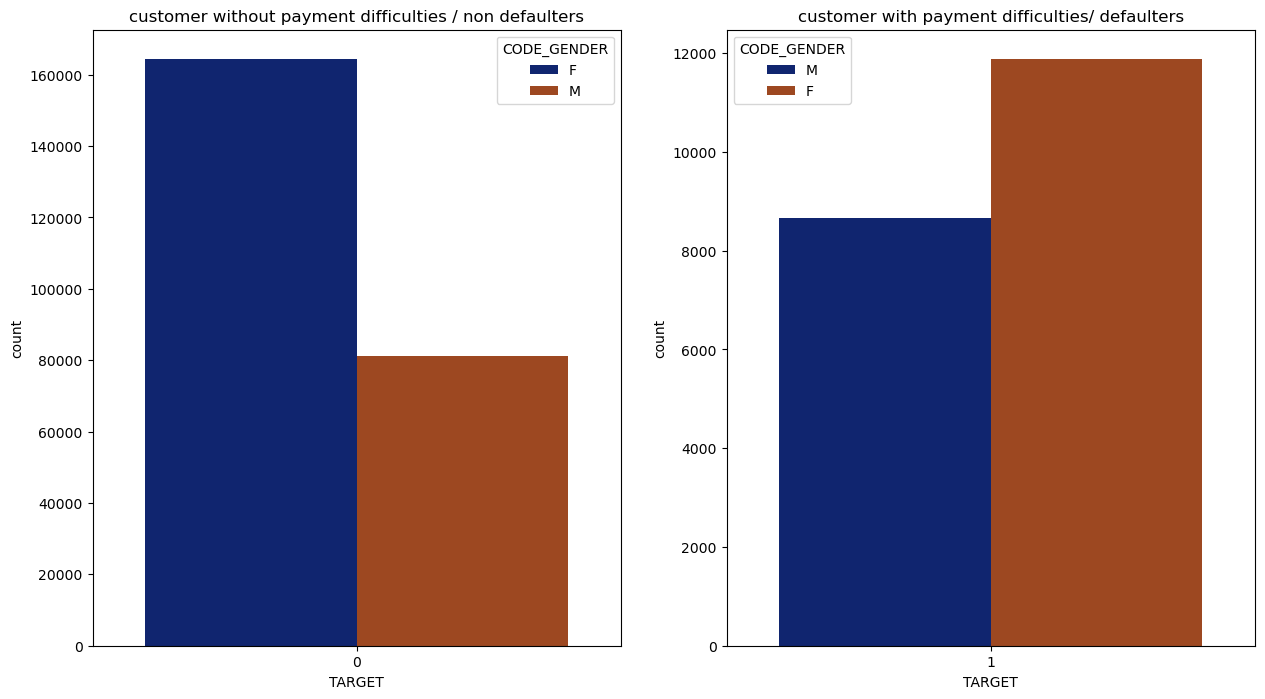

In [40]:
# plotting count plot for gender 

plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'CODE_GENDER' , palette = 'dark')
plt.title('customer without payment difficulties / non defaulters')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'CODE_GENDER' , palette = 'dark')
plt.title('customer with payment difficulties/ defaulters')
plt.show()

Here we can see that female customers have highestcount as compared to male in both the cases. but alone this analysis is not enough for choosing customer as defaulters and non defaulters.

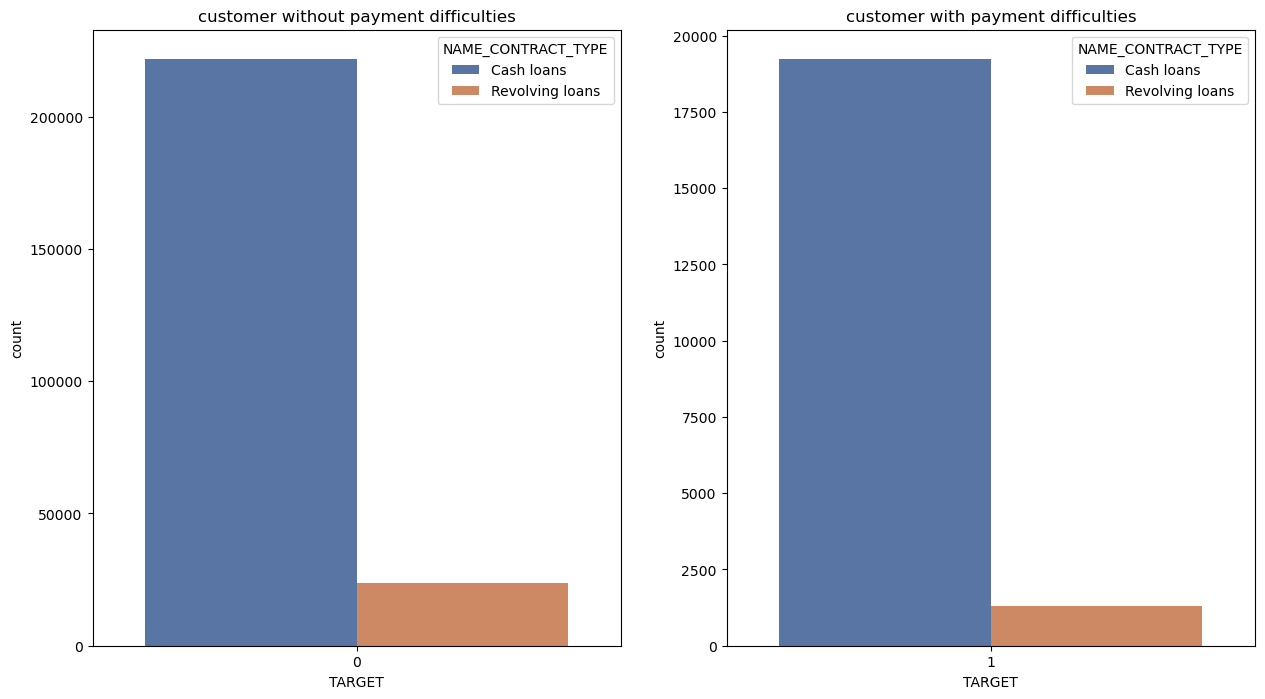

In [41]:
#plotting for NAME_CONTRACT_TYPE
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'NAME_CONTRACT_TYPE' , palette = 'deep')
plt.title('customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'NAME_CONTRACT_TYPE' , palette = 'deep')
plt.title('customer with payment difficulties')
plt.show()

here we can conclude that customer with payment difficulties and without payment difficulties both are taking Cash loan.

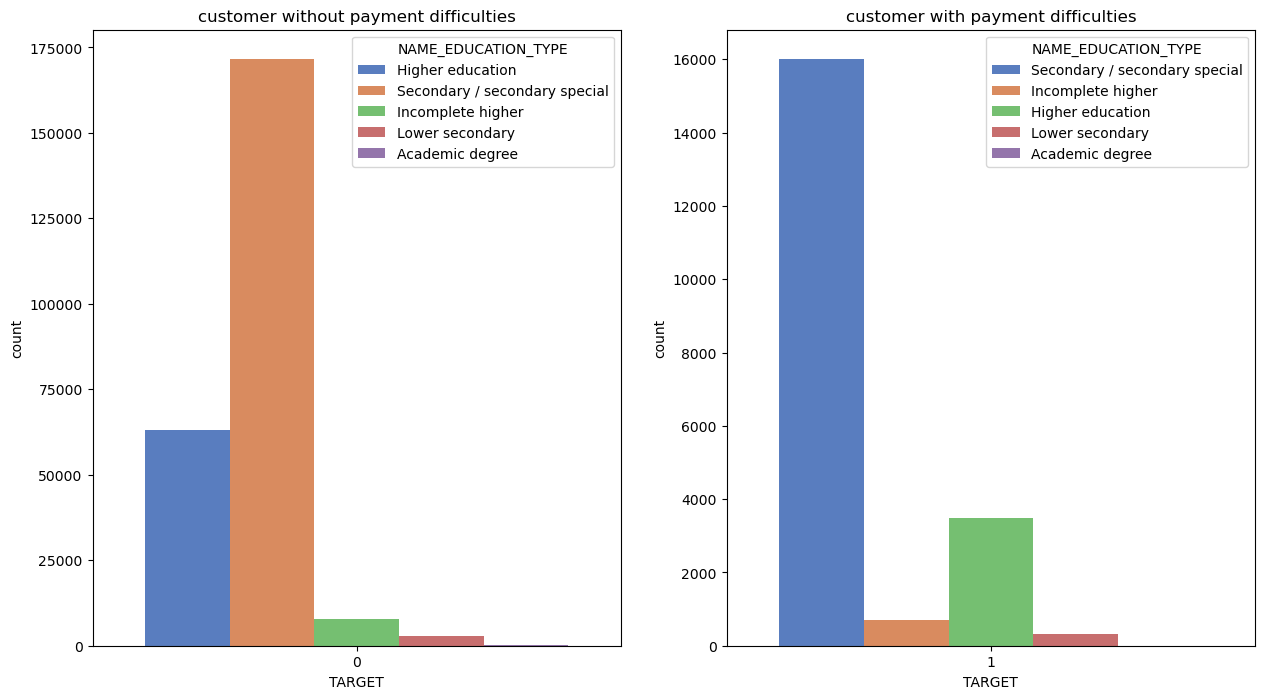

In [42]:
#plotting for NAME_EDUCATION TYPE
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'NAME_EDUCATION_TYPE' , palette = 'muted')
plt.title('customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'NAME_EDUCATION_TYPE' , palette = 'muted')
plt.title('customer with payment difficulties')
plt.show()

here we can see that clints with Secondary / secondary special education type is higher in both the cases.

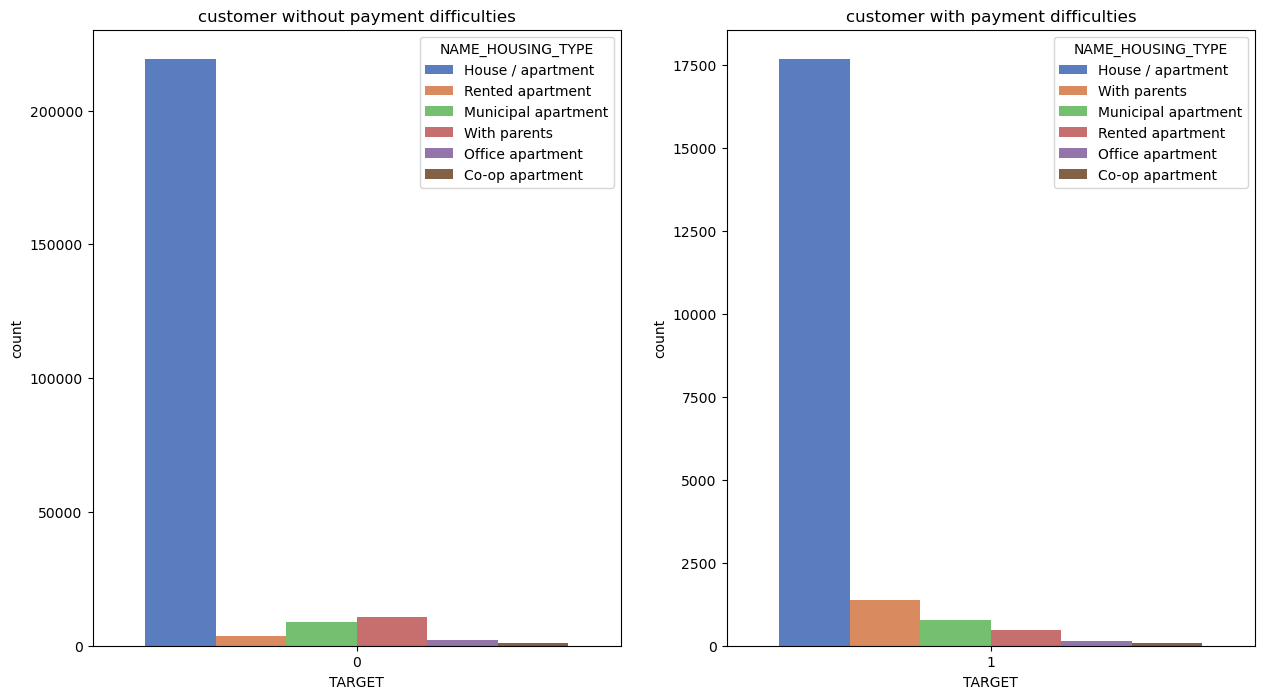

In [43]:
#plotting graph for name housing type
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'NAME_HOUSING_TYPE' , palette = 'muted')
plt.title('customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'NAME_HOUSING_TYPE' , palette = 'muted')
plt.title('customer with payment difficulties')
plt.show()

people having Home loan are higher in both the cases

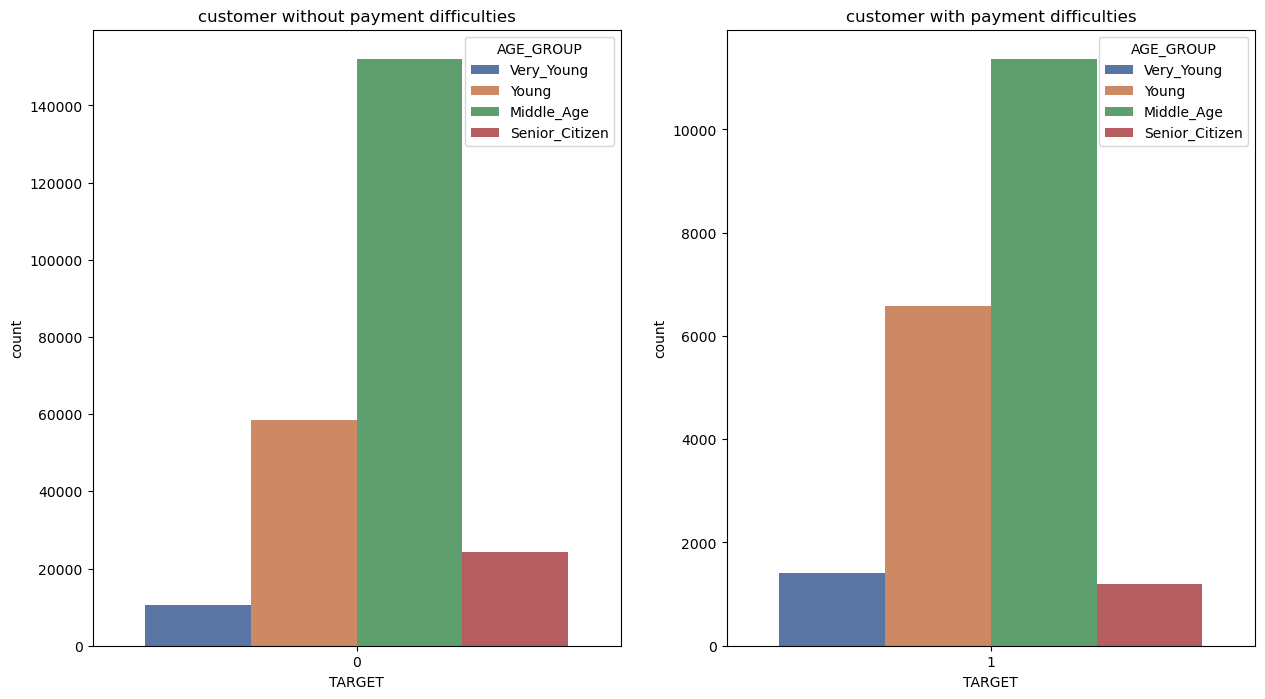

In [44]:
#plotting for age group
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'AGE_GROUP' , palette = 'deep')
plt.title('customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'AGE_GROUP' , palette = 'deep')
plt.title('customer with payment difficulties')
plt.show()

Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.

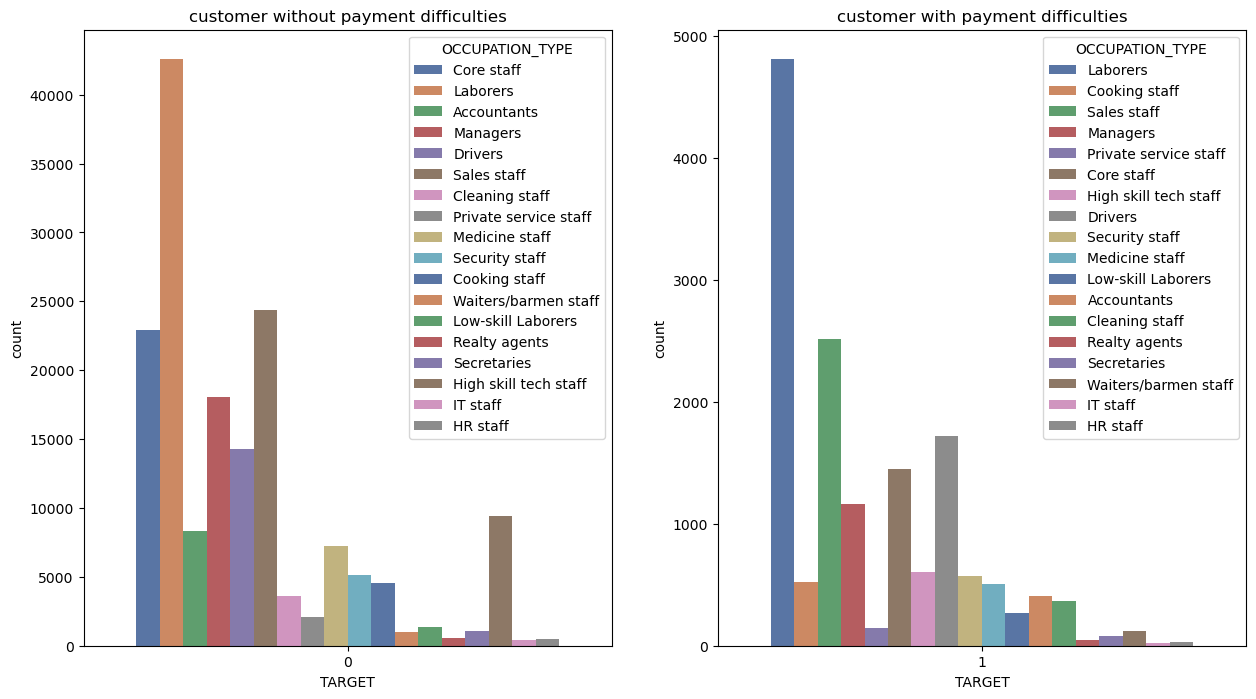

In [45]:
#plotting for occupation type
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'TARGET', data = df_target0 , hue = 'OCCUPATION_TYPE' , palette = 'deep')
plt.title('customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(x = 'TARGET' , data = df_target1 , hue = 'OCCUPATION_TYPE' , palette = 'deep')
plt.title('customer with payment difficulties')
plt.show()

Here we can see that laborers are having more difficulties in repaying the loan and also the core staff and the sales staff. But in the case of laborers non_defaulters are high in numbers than defaulters

#### univariate analysis for numerical column 

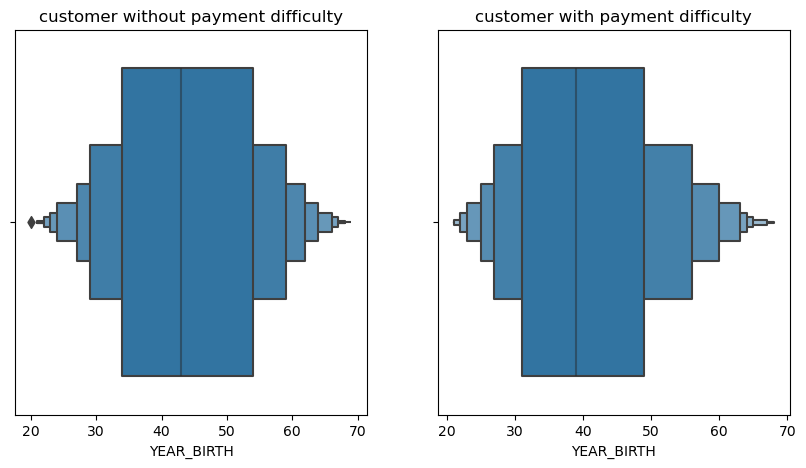

In [46]:
#plotting graph for YEAR_BIRTH
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.boxenplot(data = df_target0 , x = 'YEAR_BIRTH')
plt.title('customer without payment difficulty')
plt.subplot(1,2,2)
sns.boxenplot(data = df_target1 , x = 'YEAR_BIRTH')
plt.title('customer with payment difficulty')
plt.show()


From the above plot we can note that customer without payment difficulties having year in between 34 to 54 years , And coustomer with payment difficulties having in between 30 to 50 years.

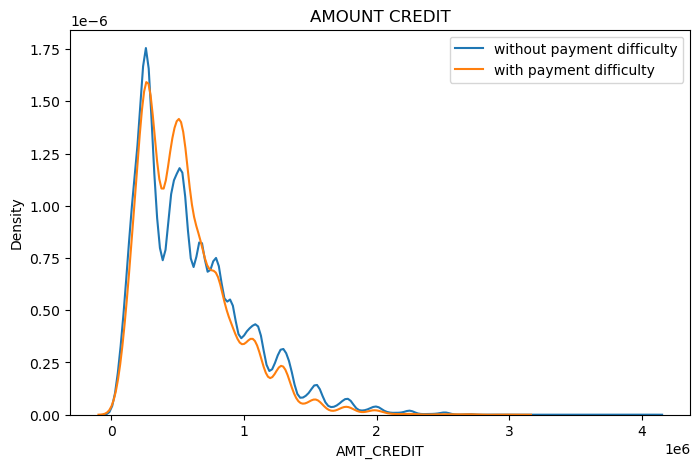

In [47]:
#plotting graph for AMT_CREDIT
plt.figure(figsize = (8,5))
sns.kdeplot(df_target0['AMT_CREDIT'] , label = 'without payment difficulty')
sns.kdeplot(df_target1['AMT_CREDIT'] , label = 'with payment difficulty')
plt.legend()
plt.title('AMOUNT CREDIT')
plt.show()

here we can see that clint with more  credit amount of loan are more defaulter

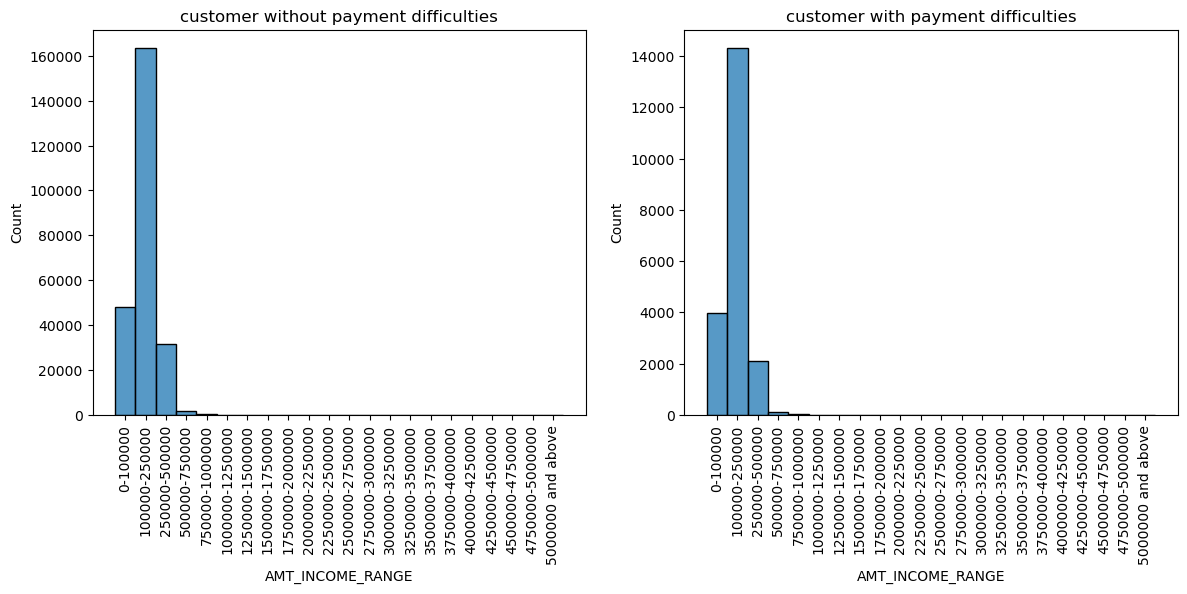

In [48]:
#plotting for AMT_INCOME_RANGE
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.histplot(x = 'AMT_INCOME_RANGE',data=df_target0)
plt.title('customer without payment difficulties')
plt.xticks(rotation = 90)
plt.subplot(1,2,2) 
ax = sns.histplot(x = 'AMT_INCOME_RANGE',data=df_target1)
plt.xticks(rotation = 90)
plt.title('customer with payment difficulties')
plt.show()

here , low income group have more difficulties in paying loan , ie. thay are more defaulters

## Bivariate analysis


#### Numerical Numerical Bivariate analysis

In [49]:
 categorical = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY', 'CREDIT_CATEGORY']

continious = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [50]:
df_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE,YEAR_BIRTH,AGE_GROUP,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government,52,Middle_Age,0,11,6,0-100000,100000-250000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Religion,54,Middle_Age,8,11,9,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Other,46,Middle_Age,4,13,1,0-100000,250000-500000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,0.0,0.0,0.0,1.0,1.0,2.0,Business Entity Type 3,37,Middle_Age,8,3,1,100000-250000,1500000-1750000


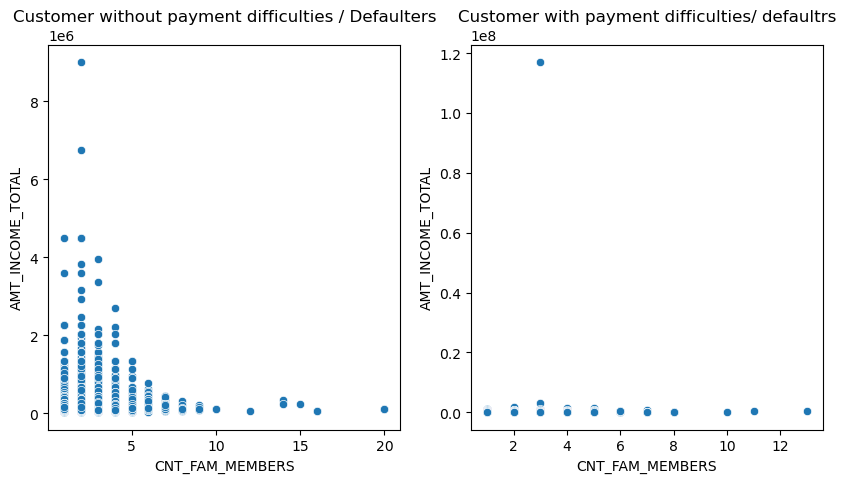

In [51]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df_target0, x = 'CNT_FAM_MEMBERS' , y ='AMT_INCOME_TOTAL' )
plt.title('Customer without payment difficulties / Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(data = df_target1 , x = 'CNT_FAM_MEMBERS' , y ='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties/ defaultrs')
plt.show()

clints with high income and less family mambers are less defaulters. defaulters are having less income.

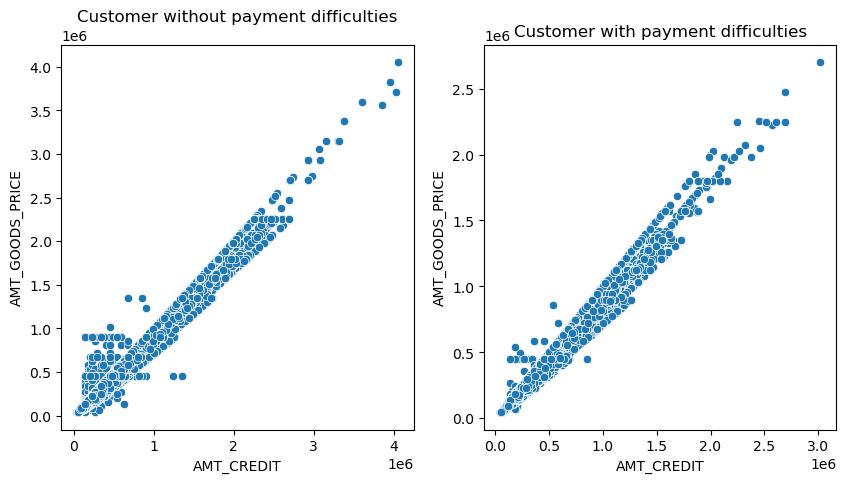

In [52]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df_target0, x = 'AMT_CREDIT' , y ='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data = df_target1 , x = 'AMT_CREDIT' , y ='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.show()

Goods price is positively correlated with credit amount

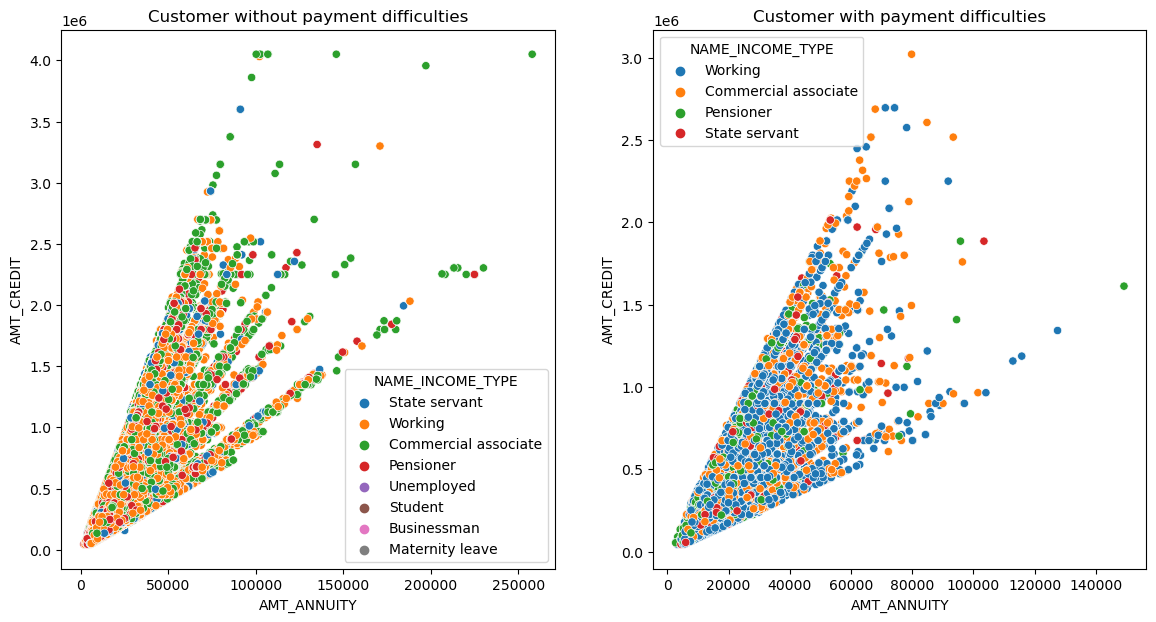

In [53]:
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
sns.scatterplot(data = df_target0, x = 'AMT_ANNUITY' , y ='AMT_CREDIT' ,hue = 'NAME_INCOME_TYPE')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data = df_target1 , x = 'AMT_ANNUITY' , y ='AMT_CREDIT' , hue = 'NAME_INCOME_TYPE' )
plt.title('Customer with payment difficulties')
plt.show()

non defaulters who are WORKING take more loan credit for the annuity that they have. pensioners having more annuity are having payment difficulties

### catogorical numerical bivariate analysis

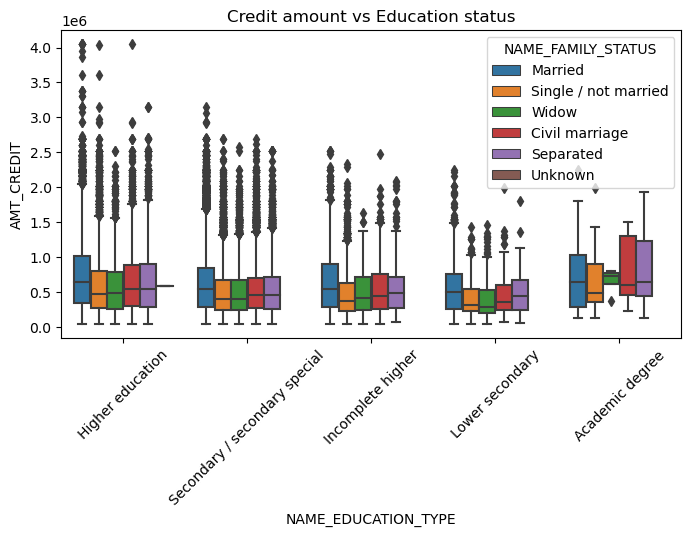

In [54]:
#box plotting for credit amount target =0 
plt.figure(figsize = (8, 4))
sns.boxplot(data = df_target0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT' , hue = 'NAME_FAMILY_STATUS')
plt.xticks(rotation = 45)
plt.title('Credit amount vs Education status')
plt.show()

we can conclude that family status with 'married', 'civil_marriage' , 'seperated' with Academic degree as education are having more number of credit than others . and higher education with 'single', 'civil marriage' have more number of outliers. 

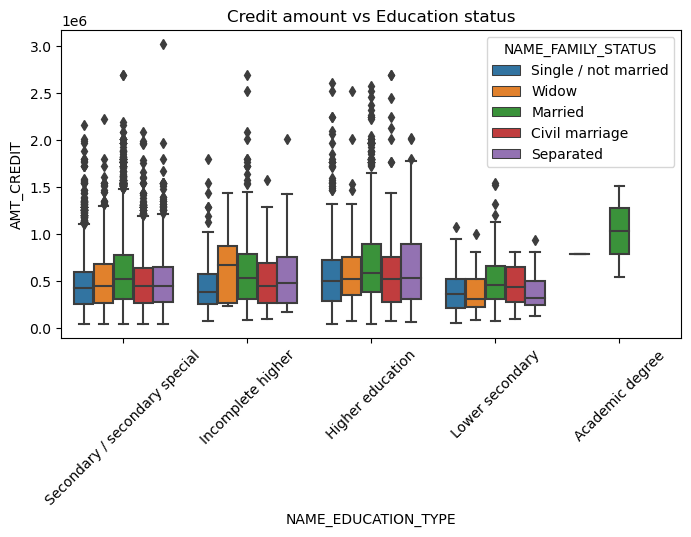

In [55]:
#box plotting target 1 customer with paymet difficulty

plt.figure(figsize = (8,4))
sns.boxplot(data = df_target1 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT' , hue = 'NAME_FAMILY_STATUS')
plt.xticks(rotation = 45)
plt.title('Credit amount vs Education status')
plt.show()

here we can conclude that married people with academic degree and more credit amount are defaulters

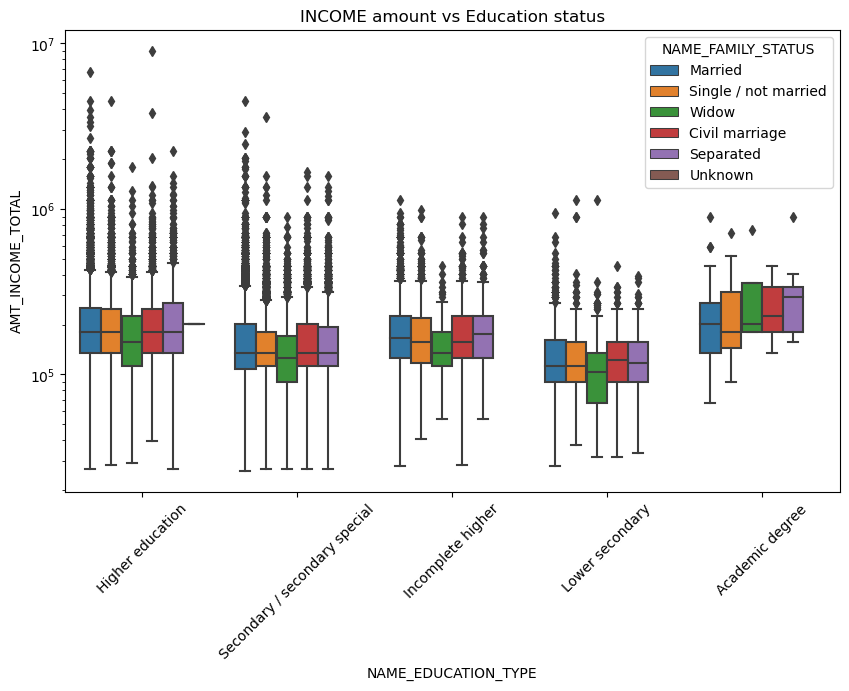

In [56]:
### box plotting for income type vs education 
plt.figure(figsize = (10,6))
sns.boxplot(data = df_target0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL' , hue = 'NAME_FAMILY_STATUS')
plt.xticks(rotation = 45)
plt.yscale('log')
plt.title('INCOME amount vs Education status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

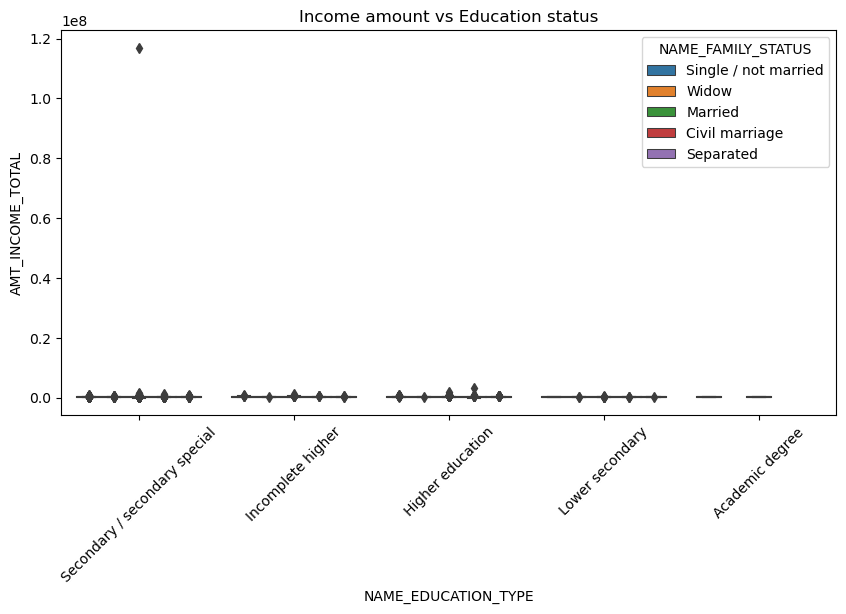

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_target1 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL' , hue = 'NAME_FAMILY_STATUS' , orient = 'v')
plt.xticks(rotation = 45)

plt.title('Income amount vs Education status')
plt.show()

From above boxplot for married with acadamic degree with more income amount having difficulties in payment

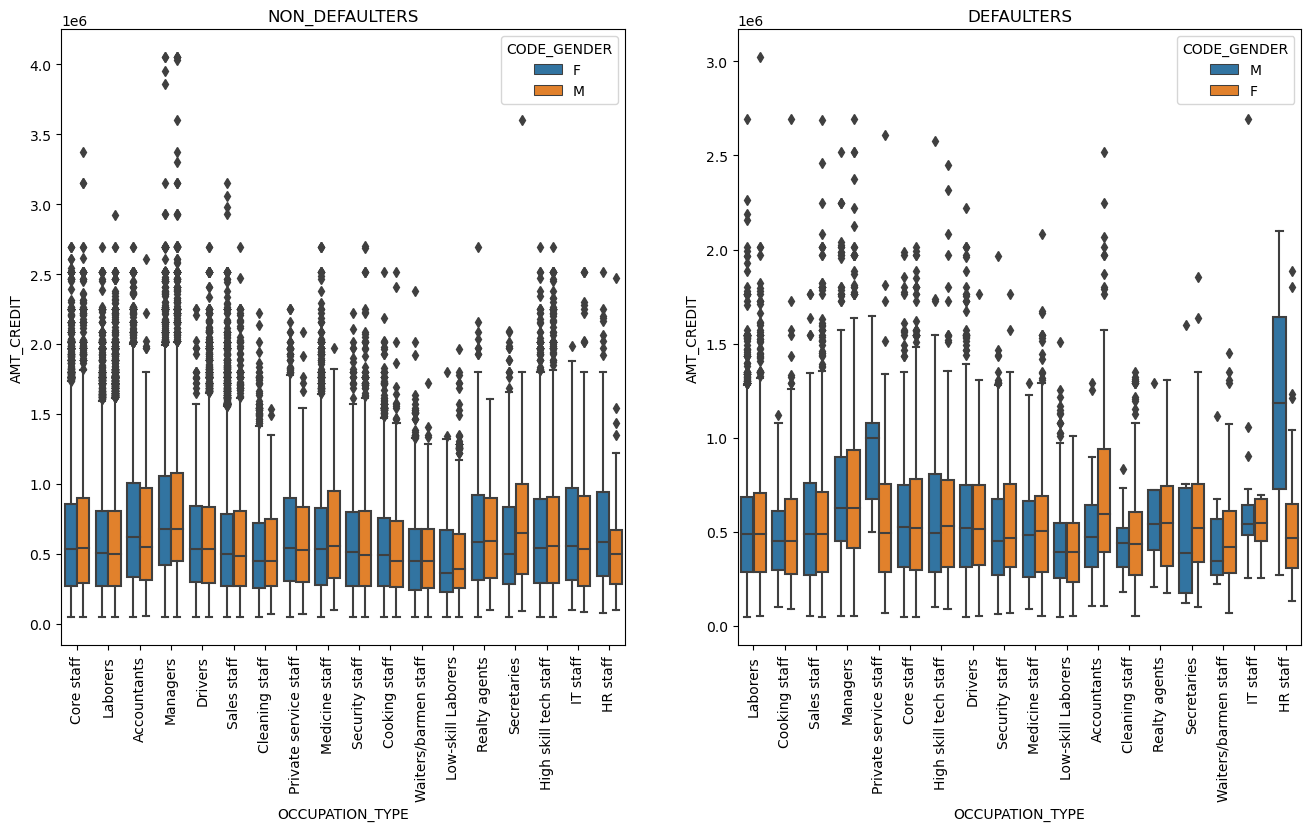

In [58]:
#plotting for income VS occupation
plt.figure(figsize = (16, 8))
plt.subplot(1,2,1)
sns.boxplot(data = df_target0 ,x= 'OCCUPATION_TYPE', y = 'AMT_CREDIT' , hue = 'CODE_GENDER')
plt.xticks(rotation = 90)
plt.title('NON_DEFAULTERS')
plt.subplot(1,2,2)
sns.boxplot(data = df_target1 , x = 'OCCUPATION_TYPE', y = 'AMT_CREDIT' , hue = 'CODE_GENDER')
plt.xticks(rotation = 90)
plt.title('DEFAULTERS')
plt.show()

Male of HR occupation have higher range of credit amount as compared to other occupations and they are more defaulters where as male members how are having payment difficulties value lies in third quantile mainly

Text(0.5, 1.0, 'Customer with payment difficulties')

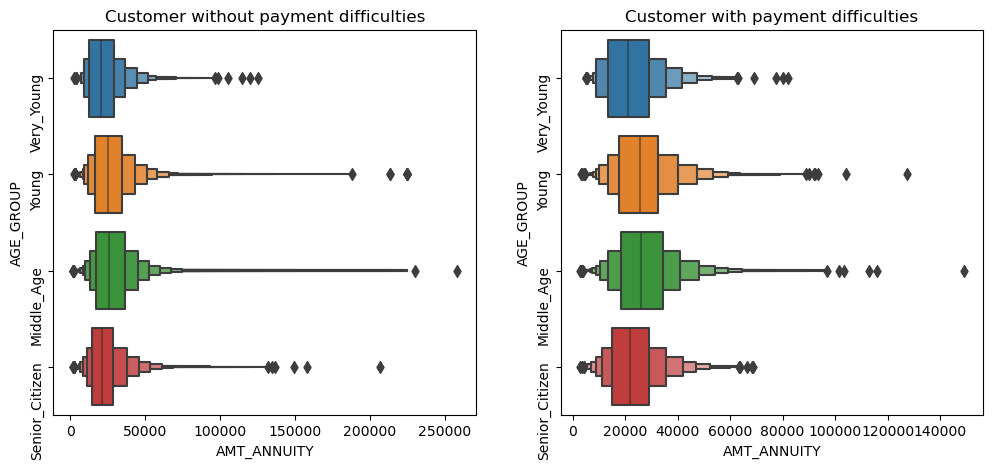

In [59]:
#plotting for annuity vs age group 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxenplot(data = df_target0, x = 'AMT_ANNUITY'  , y = 'AGE_GROUP' )
plt.yticks(rotation = 90)
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxenplot(data = df_target1, x = 'AMT_ANNUITY'  , y = 'AGE_GROUP')
plt.yticks(rotation = 90)
plt.title('Customer with payment difficulties')

we can observe that middle age group clints who have more annuity amount are defaulters. and seniors citizen who have payment difficulties are taking less annuity as comapred to any other age group

### catagorical catagorical bivariate analysis

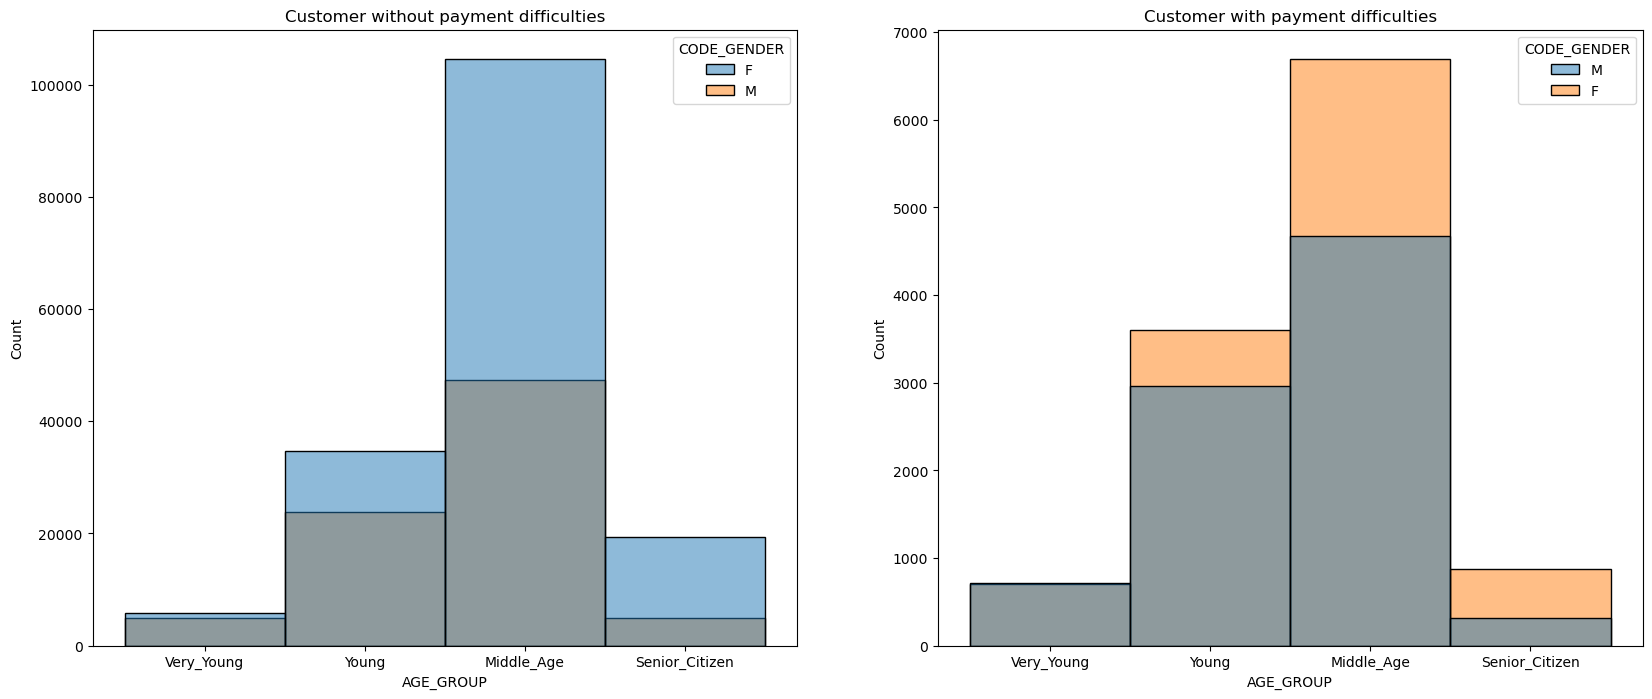

In [60]:
#plotting for age vs gender
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.histplot(data = df_target0 , x = 'AGE_GROUP' , hue = 'CODE_GENDER')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.histplot(data = df_target1 , x = 'AGE_GROUP' , hue = 'CODE_GENDER')
plt.title('Customer with payment difficulties')
plt.show()

male of middle age group are more defaulters.

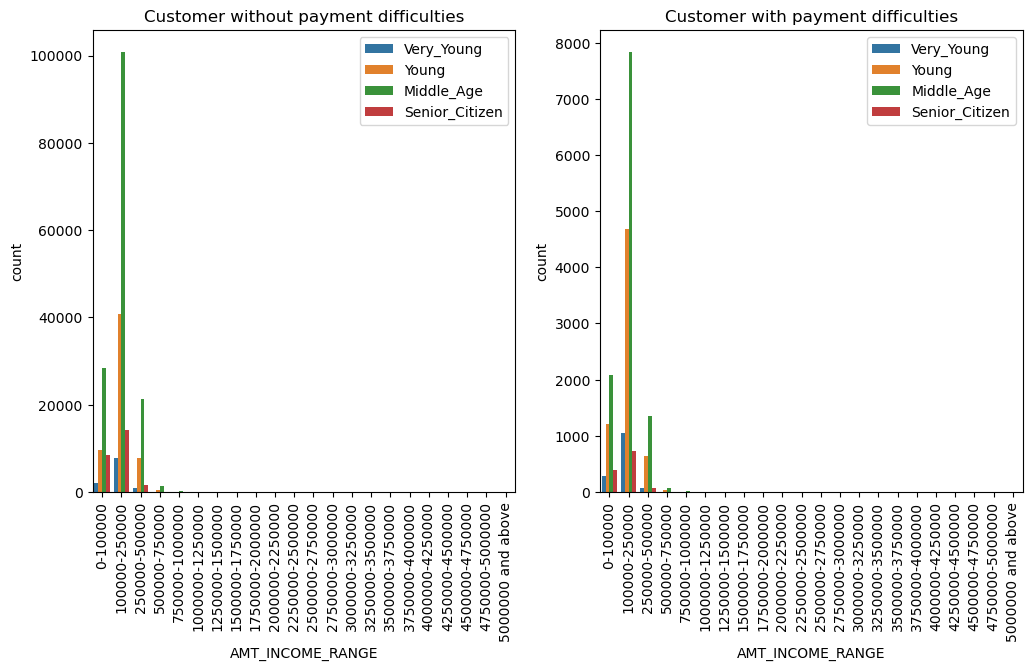

In [61]:
#plotting for gender vs income range
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(data = df_target0 , x =  'AMT_INCOME_RANGE' , hue = 'AGE_GROUP')
plt.title('Customer without payment difficulties')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.countplot(data = df_target1 , x = 'AMT_INCOME_RANGE', hue = 'AGE_GROUP')
plt.xticks(rotation = 90)
plt.title('Customer with payment difficulties')
plt.legend(loc = 'upper right')


mainly middle age group clints having income range 100000-250000 have applied for lone 

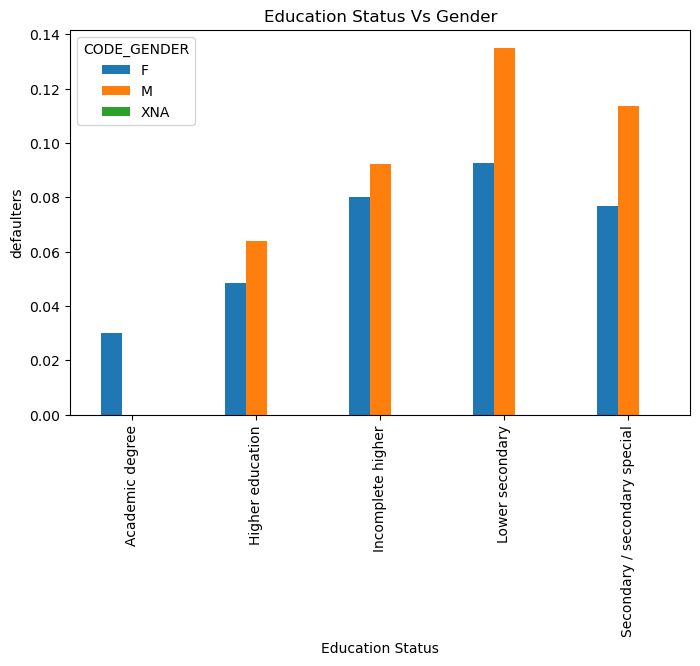

In [62]:
#education vs gender vise
app_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('defaulters')
plt.title('Education Status Vs Gender')
plt.show()

Male with lower secondary education are have more payment difficulties followed by Seconday/secondary special education.

### correlation 

In [63]:
#for target 0
continuous_col = df_target0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','EXT_SOURCE_2', 'EXT_SOURCE_3']]

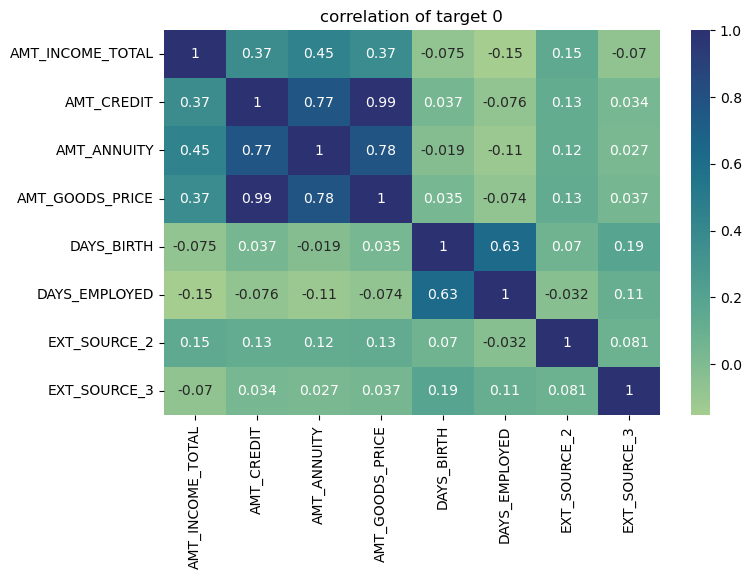

In [64]:
cor = continuous_col.corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor , annot = True , cmap ='crest')
plt.title('correlation of target 0')
plt.show()

We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are highly correlated. External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.

In [65]:
#correlation for continuous variable of target 1
continuous_col = df_target1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','EXT_SOURCE_2', 'EXT_SOURCE_3']]

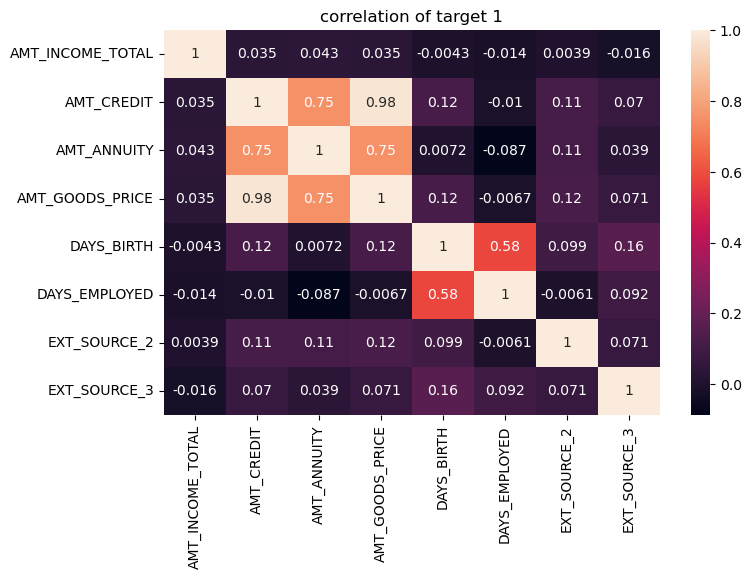

In [66]:
cor = continuous_col.corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor , annot = True )
plt.title('correlation of target 1')
plt.show()

We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are mederately correlated with each other. External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.

In [67]:
#top 10 correlation
corr1 = df_target1.corr()

In [68]:
sort_corr = corr1.unstack().sort_values(ascending = False)
sort_corr1= sort_corr[sort_corr !=1]

In [69]:
top_10_correlation = sort_corr1.head(10)
top_10_correlation

YEAR_EMPLOYED      DAYS_EMPLOYED        1.000000
DAYS_EMPLOYED      YEAR_EMPLOYED        1.000000
YEAR_BIRTH         DAYS_BIRTH           0.999682
DAYS_BIRTH         YEAR_BIRTH           0.999682
DAYS_REGISTRATION  YEAR_REGISTRATION    0.999480
YEAR_REGISTRATION  DAYS_REGISTRATION    0.999480
DAYS_ID_PUBLISH    YEAR_ID_PUBLISH      0.997489
YEAR_ID_PUBLISH    DAYS_ID_PUBLISH      0.997489
AMT_CREDIT         AMT_GOODS_PRICE      0.982627
AMT_GOODS_PRICE    AMT_CREDIT           0.982627
dtype: float64

##  Merging application_data_df with previous_application_data_df

In [70]:
prev_df = pd.read_csv('previous_application.csv')
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
prev_df.shape

(1670214, 37)

In [72]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
#merging prev df and application df
merge_df = pd.merge(left = app_df1 , right= prev_df ,how = 'inner' , on = 'SK_ID_CURR' , suffixes = '_x')

In [74]:
merge_df.shape

(1250074, 85)

In [75]:
merge_df.isnull().sum()*100/len(merge_df)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_             0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_                     0.000000
AMT_ANNUITY_                    0.000000
AMT_GOODS_PRICE_                0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                32.305128
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PRO

### data understanding  & handling missing values 

In [76]:
#as values of DAYS_DECISION column is negavtive which is not possible so appling abs( ) to make this column positive
merge_df['DAYS_DECISION'] = abs(merge_df['DAYS_DECISION']//30)

In [77]:
#imputing nan in place where value is XNA and XNP
merge_df.replace('XNA',np.nan,inplace=True)
merge_df.replace('XAP',np.nan,inplace=True)

In [78]:
# dropping columns whicha are not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_STARTx', 'HOUR_APPR_PROCESS_STARTx','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

merge_df = merge_df.drop(cols_to_be_deleted, axis = 1)

In [79]:
#we will check the percentage of each type of contract status
merge_df['NAME_CONTRACT_STATUS'].value_counts()*100/len(merge_df)

Approved        62.388787
Canceled        18.348434
Refused         17.558321
Unused offer     1.704459
Name: NAME_CONTRACT_STATUS, dtype: float64

In [80]:
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE,YEAR_BIRTH,AGE_GROUP,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Business Entity Type 3,25,Very_Young,1,9,5,100000-250000,250000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,0.000000,NaN,NaN,NaN,Approved,21,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,Auto technology,24.0,low_normal,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,NaN,NaN,NaN,NaN,Approved,25,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,0.000000,NaN,NaN,NaN,Approved,28,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0,middle,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,0.100061,NaN,NaN,NaN,Approved,79,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0,middle,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government,52,Middle_Age,0,11,6,0-100000,100000-250000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,242

### Univariate Analysis of merged data frame

In [81]:
#plottoing for catagorical column 
catagorical1 = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO' ,'CHANNEL_TYPE']


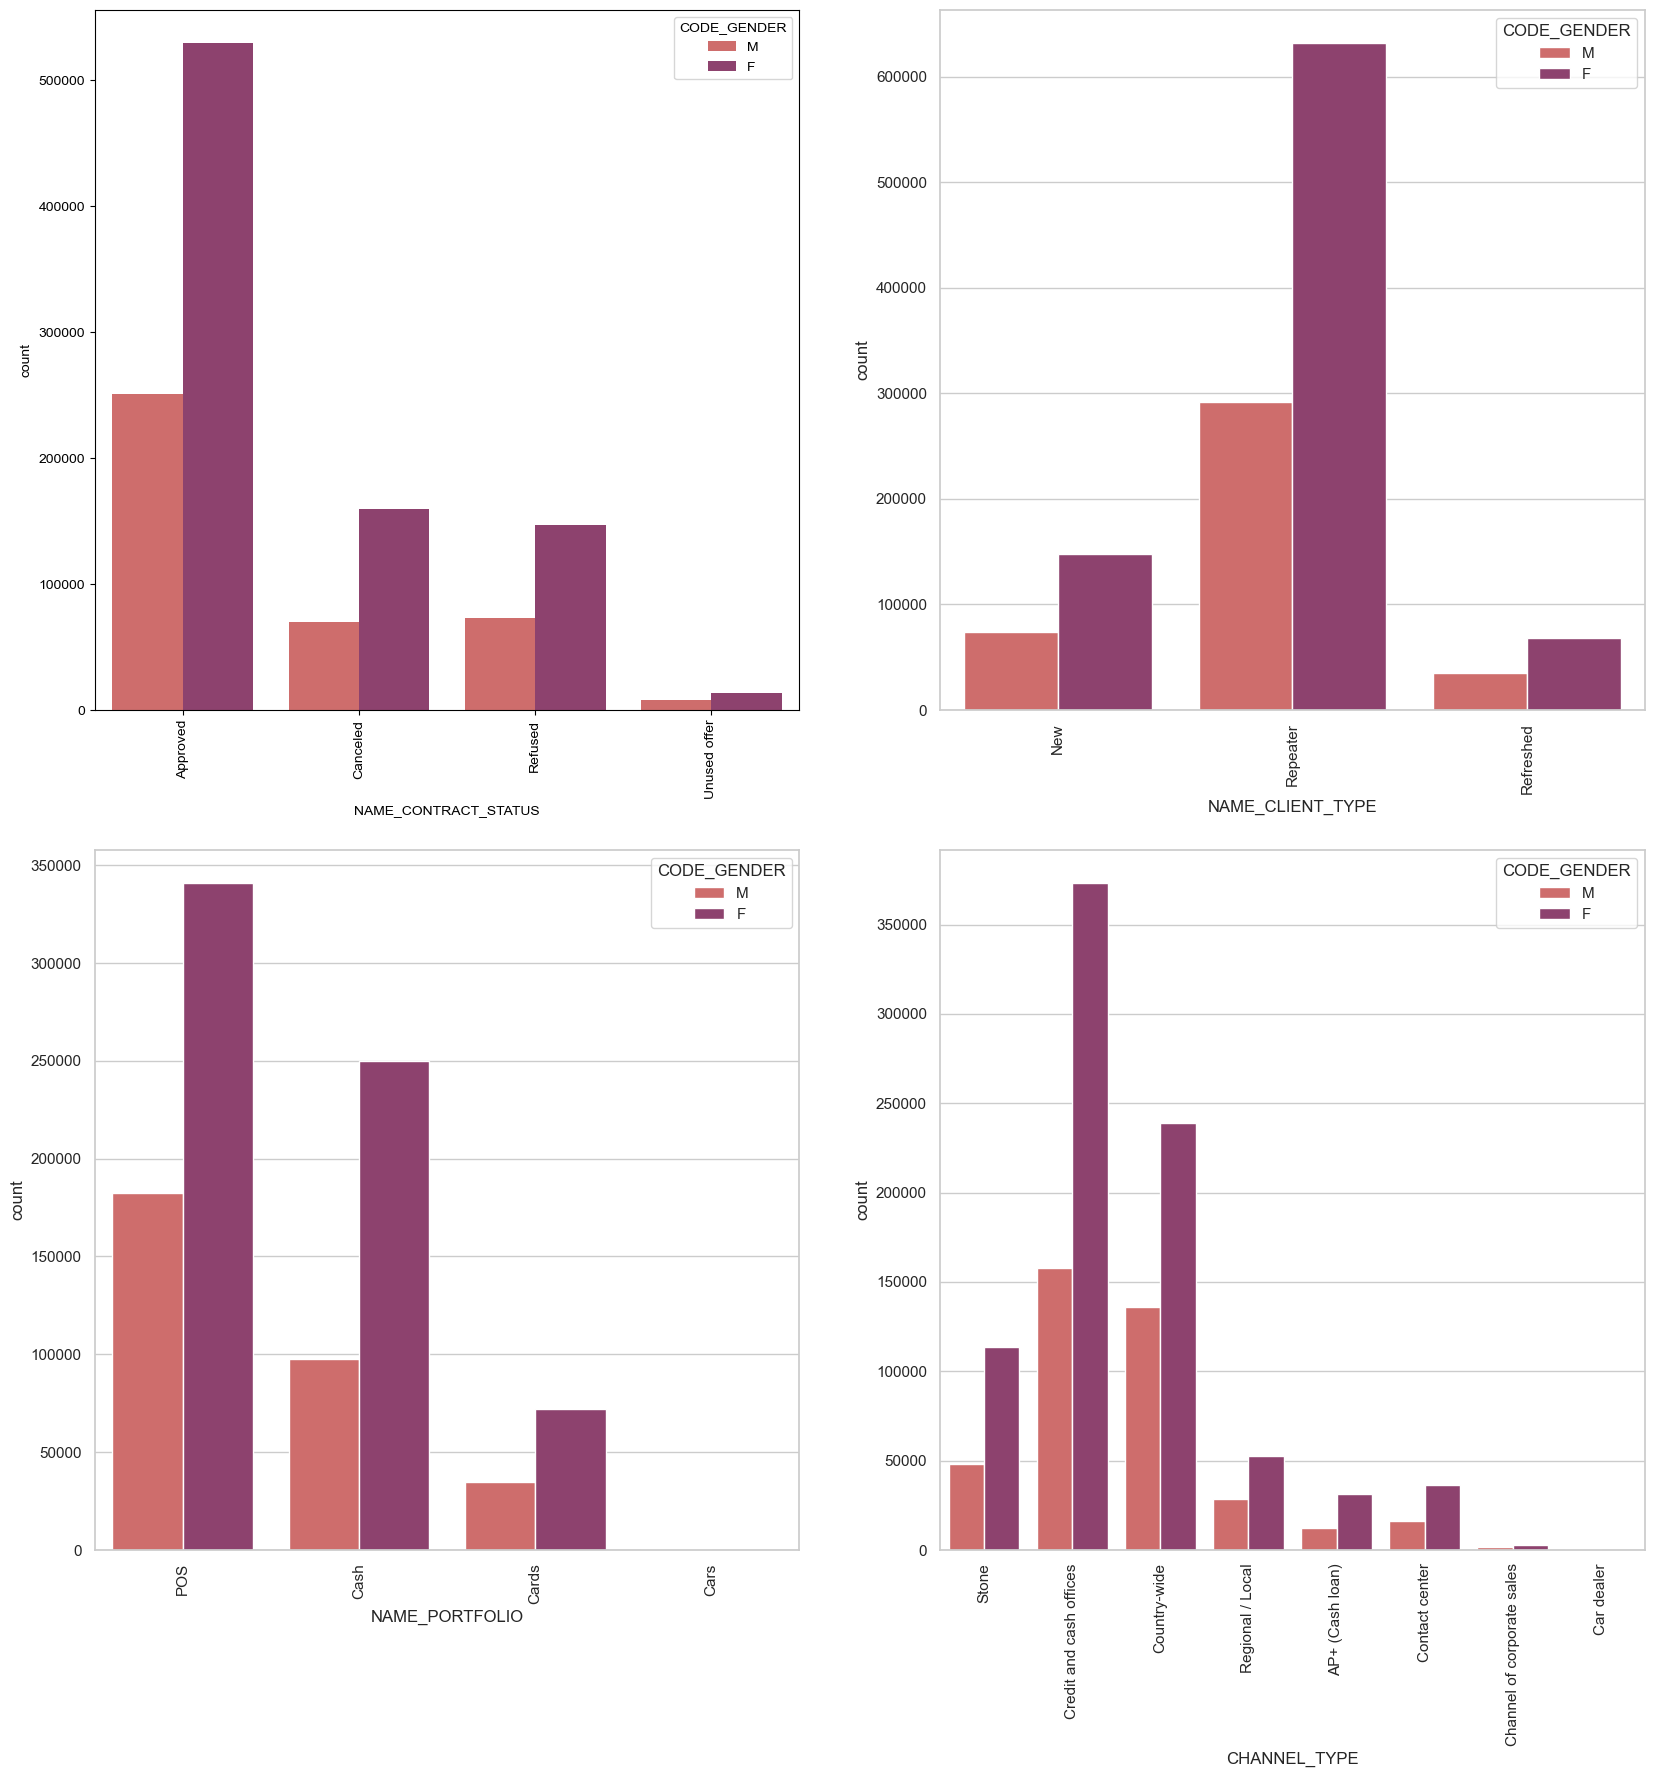

In [82]:
plt.figure(figsize = (20,20))
i = 1
for var in catagorical1:
    plt.subplot(2,2,i)
    sns.countplot(x = var, data = merge_df , palette = 'flare' , hue = 'CODE_GENDER')
    sns.set_theme(style="whitegrid")
    plt.xticks(rotation = 90)
    i +=1
plt.show()

    

1. approved loan status are higher in numbers as compare to rejected 
2. repeater clints are higher in numbers are compared to new clints
3. pos loans are higher followed by cash loans 
4. credit and cash offices channel type is most used followed by country wide channel type

### Univariate analysis of numerical column 

In [83]:
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZAION_TYPE,YEAR_BIRTH,AGE_GROUP,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Business Entity Type 3,25,Very_Young,1,9,5,100000-250000,250000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,0.000000,NaN,NaN,NaN,Approved,21,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,Auto technology,24.0,low_normal,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,NaN,NaN,NaN,NaN,Approved,25,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,0.000000,NaN,NaN,NaN,Approved,28,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0,middle,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,School,45,Middle_Age,3,3,0,250000-500000,1250000-1500000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,0.100061,NaN,NaN,NaN,Approved,79,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0,middle,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Government,52,Middle_Age,0,11,6,0-100000,100000-250000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,242

In [84]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250074 entries, 0 to 1250073
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1250074 non-null  int64   
 1   TARGET                       1250074 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1250074 non-null  object  
 3   CODE_GENDER                  1250074 non-null  object  
 4   FLAG_OWN_CAR                 1250074 non-null  object  
 5   FLAG_OWN_REALTY              1250074 non-null  object  
 6   CNT_CHILDREN                 1250074 non-null  int64   
 7   AMT_INCOME_TOTAL             1250074 non-null  float64 
 8   AMT_CREDIT_                  1250074 non-null  float64 
 9   AMT_ANNUITY_                 1250074 non-null  float64 
 10  AMT_GOODS_PRICE_             1250074 non-null  float64 
 11  NAME_INCOME_TYPE             1250074 non-null  object  
 12  NAME_EDUCATION_TYPE         

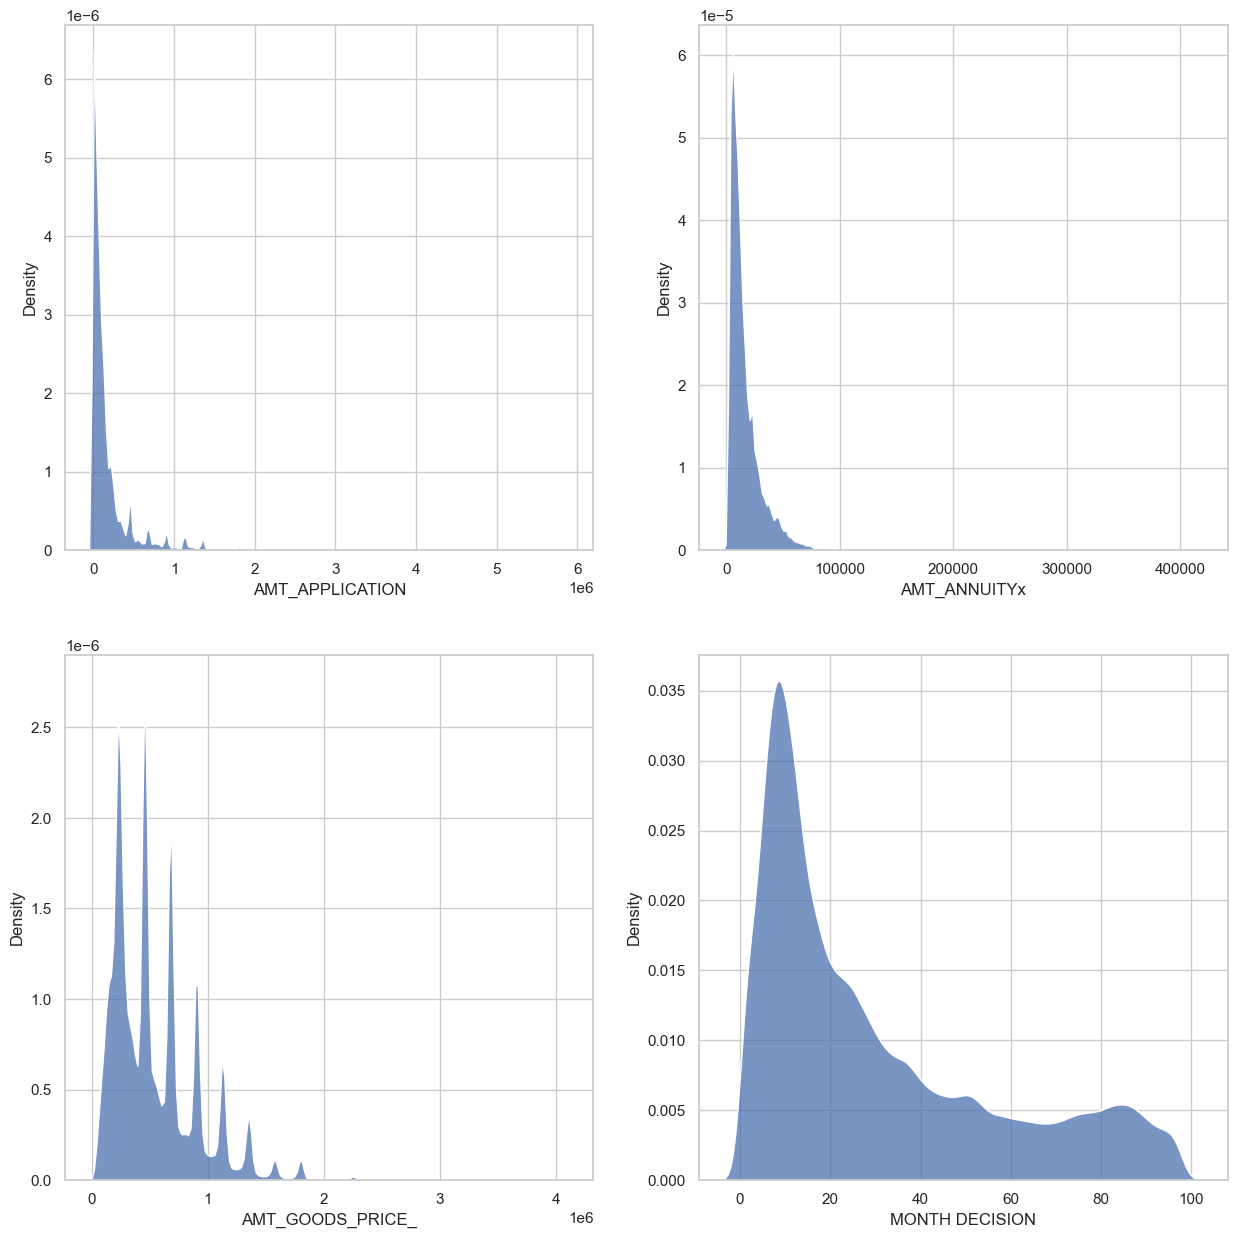

In [85]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_ANNUITYx', 'AMT_GOODS_PRICE_', 'DAYS_DECISION']

plt.figure(figsize = (15,15))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        a = sns.kdeplot(merge_df[col], label = 'MONTH DECISION' , multiple="stack" )
        a.set(xlabel = 'MONTH DECISION')
    else:
        ax = sns.kdeplot(merge_df[col] , multiple="stack")
        ax.set(xlabel = col)
    i += 1
plt.show()

1. Most of the loan application amount were between 1000000 t0 5000000. 
2. Amount Annuity , is also following the pattern of loan application. maximum annuity is between 100000 - 300000
3.  based on the price of the goods, the loan was approved and amount was credited.
4. most month decision took to approve loan applications is  10-20 months  

### Bivariate analysis

In [86]:
cols = merge_df[['AMT_ANNUITYx', 'AMT_APPLICATION', 'AMT_CREDIT_', 'AMT_GOODS_PRICE_', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_DECISION']]


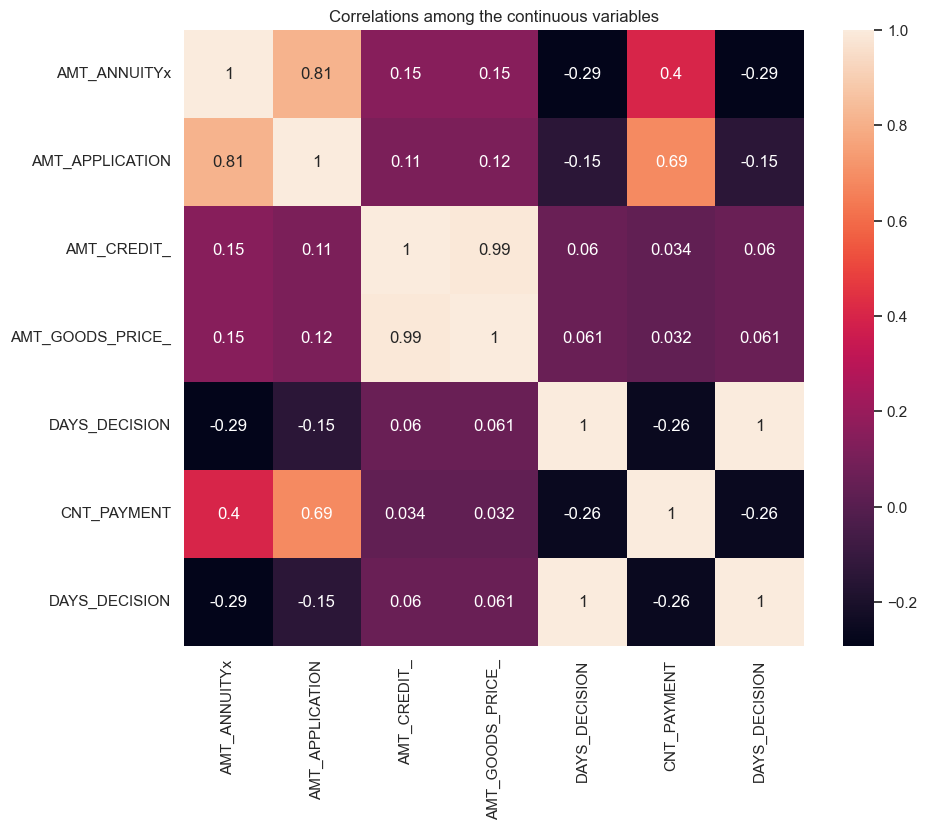

In [87]:
plt.figure(figsize = (10,8))
cor = cols.corr()
sns.heatmap(cor, annot = True )
plt.title('Correlations among the continuous variables')
plt.show()

here we can see that AMT_APPLICATION is  highly correlated with  AMT_ANNUITY , AMT_CREDIT, DAYS_DECISION. DAYS_DECISION is correlated with all variables

### Bivariate analysis of continuous columns 

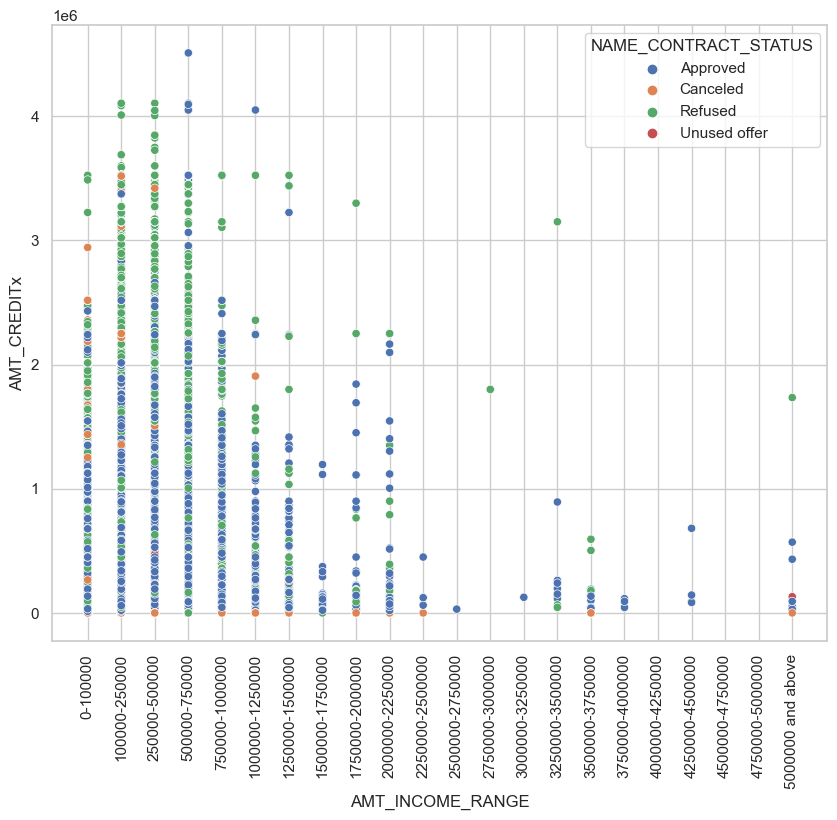

In [88]:
plt.figure(figsize = (10,8))
sns.scatterplot( data = merge_df, x = 'AMT_INCOME_RANGE',y ='AMT_CREDITx', hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation = 90)
sns.set_theme(style="white")
plt.show()

AMT_INCOME and AMT_CREDIT are posotively correlated and mostly concentrated near the lower region. High AMT_CREDIT loansare most likely to be refused.

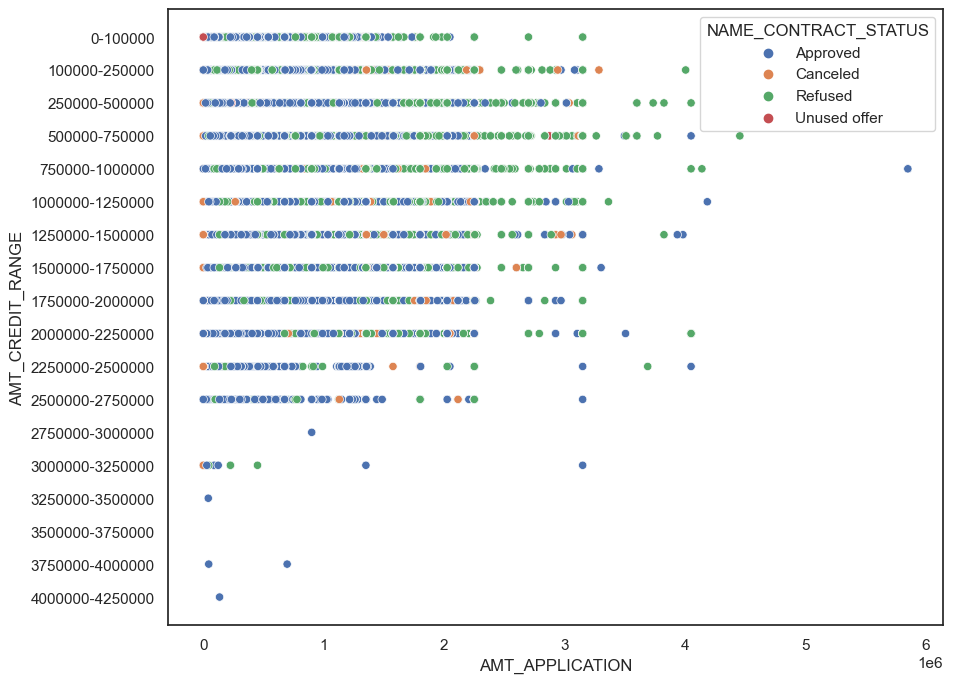

In [89]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = merge_df , x = 'AMT_APPLICATION', y ='AMT_CREDIT_RANGE', hue='NAME_CONTRACT_STATUS')
plt.show()

Credit amount and the amt application is highly correlated. high amount application are refused more. 


### Bivariate analysis for catagorical column 

In [90]:
catagorical1 = merge_df[['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO' ,'CHANNEL_TYPE']]

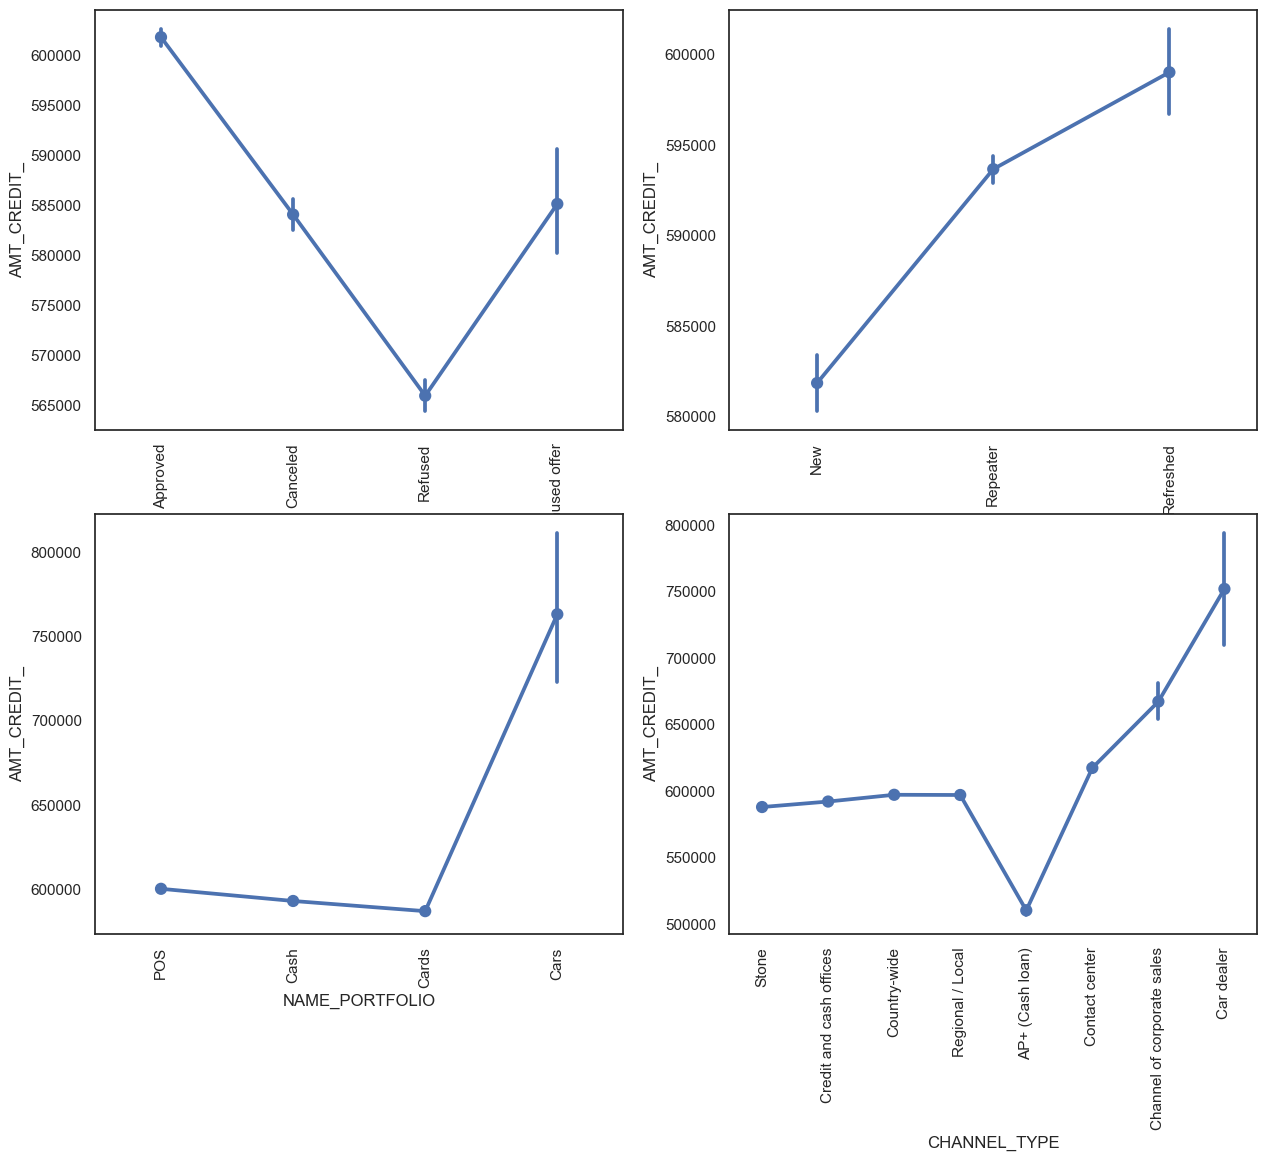

In [91]:
plt.figure(figsize=(15,12))
i=1
for var in catagorical1:
    ax = plt.subplot(2,2,i)
    sns.pointplot( data=merge_df, x = var, y = 'AMT_CREDIT_')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

1. loan of maximum  amount credit was approved in status
2. avg of refreshed clints  for loan credit is more than Repeater client.
3. Car loan got more credited.
4. Through the car dealer channel, more loan got credited.

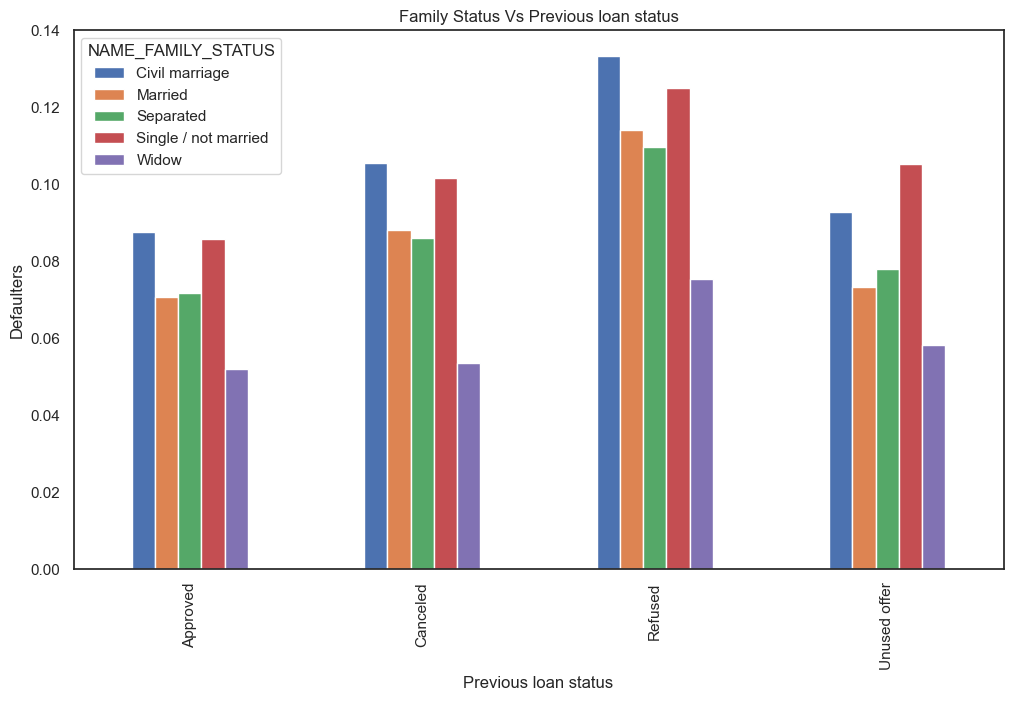

In [92]:
merge_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(12,7))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

Client who did civil marriage and had  previously refused loan by bank ar more defaulted currently. followed by single people 



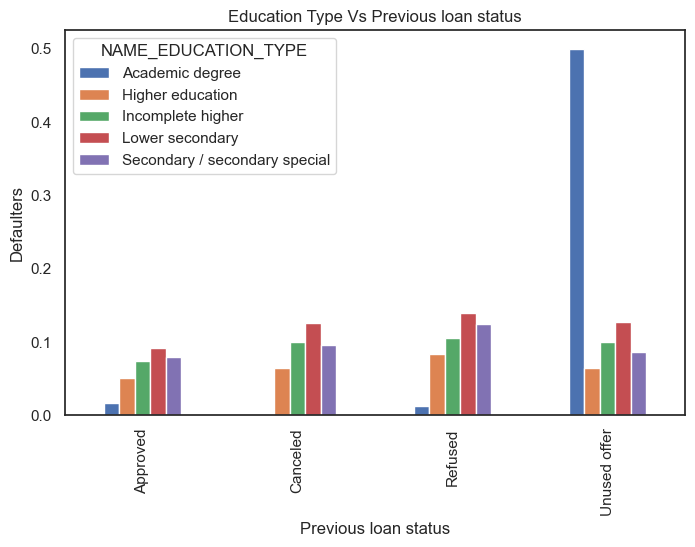

In [93]:
#Educatuion status Vs Previous loan status
merge_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

people with Academic degree who previously unused offer are more defaulted in current application.

## Conclusion

Now that we have understood and gained insight into the dataset ie. the final insights are -

- High AMT_CREDIT loans are most likely to be refused by  .high amount application are refused more.
- Client who did civil marriage and had previously refused loan by bank ar more defaulted currently.
- based on the price of the goods, the loan was approved and amount was credited.
- people with Academic degree who previously unused offer are more defaulted
- Male with lower secondary education level are have more defaulters followed by Seconday/secondary special education.
- we can observe that middle age group clints who have more annuity amount are defaulters
#### Future analysis


1. Banks should focus more on income type ‘student',’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
